In [1]:
import sys
import h5py
import glob
import numpy as np 
from numpy import random
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
from scipy.signal import butter
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel
import time
import random

from src.parameters import Parameters as p

from src.gauss import Gauss
from src.slowfit import Slow_Fit
from src.maxmin import MaxMin
from src.fastfit import Fast_Fit
from src.slices import Slice
from src.peakfinder import Peakfinder
from src.filterpeaks import Filter_peaks
from src.fastbackloop import Fast_Backloop

In [2]:
print(Fast_Backloop)

<class 'src.fastbackloop.Fast_Backloop'>


In [3]:
# reading h5 file
f = h5py.File("2019-10-14_02-45-48_threestage_v1_PSSS_LINAC1_Phase_0.h5")
list(f.keys())
shots = f.get("n-shots")
photE = f.get("x-axis")
intense = f.get("y-axis")
spectrum = range(0,len(intense[1,:]-1)) # for parameter redefinition
p.x = np.asarray(spectrum)

x = p.x

In [4]:
# Peak finding parameters
p.heightcut = 10 # percentage height of max a peak must be
p.prominence = 10 # percentage prominence required for peak
p.nn_distance = 5
p.alpha = 1.5
p.beta = 1.5

heightcut = p.heightcut
prominence = p.prominence
nn_distance = p.nn_distance
alpha = p.alpha
beta = p.beta

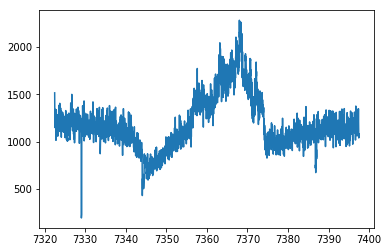

In [5]:
plt.plot(photE,intense[5])

In [6]:
# Lowpass/backloop conditions
p.deg = 5 # lowpass function degree. Chosen by inspection.
p.threshold = 10 # percentage overlap threshold for spectra to be sent through slow fit
p.backloop_condition_slow = 5
p.backloop_condition = 8 # percentage height difference between max of raw and max of lp function (maybe determine in terms of noise)
deg = p.deg
threshold = p.threshold
backloop_condition_slow = p.backloop_condition_slow
backloop_condition = p.backloop_condition

In [7]:
# 3_stage_phase_3 & 4 - check first
#avg spectra 
# 2 stage linac one : narrower spike width

Optimising lowpass cutoff for fast fit
Trialled for spectrum 126
Trialled for spectrum 16
Trialled for spectrum 143
Trialled for spectrum 57
Average cutoff for dataset: 0.0523


/Users/Sara/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Time taken for fast fit: 0.8514841477076213 minutes
Number of spectra to be analysed by slow fit:  137
Beginning slow fit
2283.996626366357 1458.7522857706285
824.3102124851446 337.9532377448047
713.554683834738 210.99764435917754
565.7062413752208 166.83847348783578
551.2016131954335 142.1178927293236
504.38024692881504 110.22642833602177
lpcutoff: 0.0051
[ 685 1545]
Finding first minmax within 0,1169
(2, 2560)
[7322.47021484 7367.77001953] [640.14842681 934.10926935]


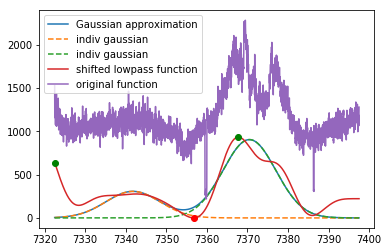

4041.9965229029467 1701.3018167472142
2335.8739276450647 495.61618783231347
2174.346006342184 364.9627375554239
1982.0285682411245 317.8901274020639
1804.98580461977 273.77118468386425
1644.975783395983 241.21610173530064
1512.5212831237332 215.0834460461072
1397.0868886327798 195.3160074798573
lpcutoff: 0.0071
[1584]
Finding first minmax within 0,2560
(1, 2560)
[7368.91308594] [1789.78362724]


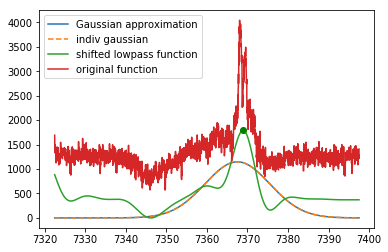

2186.9968048752744 1486.8861167384534
690.5590679129721 269.31346479627337
639.2664351658557 166.80602105895585
573.4942561391133 116.3559462132313
545.2180396523756 96.8608008661103
lpcutoff: 0.0041
[ 432 1503]
Finding first minmax within 0,833
(2, 2560)
[7322.47021484 7366.53857422] [729.55596226 851.2150844 ]


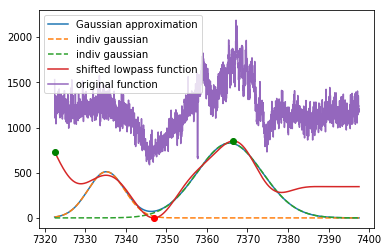

2284.996928443402 1487.6207647052465
841.6897810972268 325.525548152102
663.2125855689424 180.5327901985796
542.6273121286963 114.07881300718368
lpcutoff: 0.0031000000000000003
[1472]
Finding first minmax within 0,2560
(1, 2560)
[7365.62939453] [918.94035266]


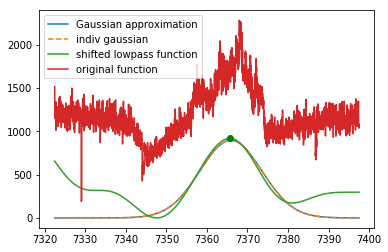

2249.9979636481335 1501.5595560508393
848.6404415008792 246.11406794029133
724.7466225869682 131.51087141122824
630.9760653076307 110.02258114958516
lpcutoff: 0.0031000000000000003
[ 646 1599]
Finding first minmax within 0,1032
(2, 2560)
[7322.47021484 7369.35302734] [272.45956947 602.98771117]


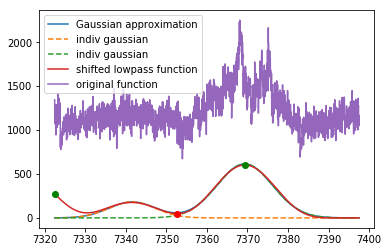

2367.996633679566 1635.850974237668
773.1899705437934 301.12490381242327
667.2809335500372 199.28500780666914
549.7679701328157 167.3590999829531
455.55859020414687 139.74756131443087
392.750413042176 131.1986375423726
366.03663035094314 127.93936297752222
356.88435130655307 126.27362362525103
352.09405020330155 124.13660248044864
344.5447433403033 122.18099490604446
334.39735888066866 120.81332564933238
323.590413672915 119.77366472797387
313.5267883238471 118.75518522084573
304.63102083700915 117.57415229383288
lpcutoff: 0.013100000000000004
[1517 1942]
Finding first minmax within 0,1818
(2, 2560)
[7366.94873047 7379.40966797] [1215.75222792  563.10465228]


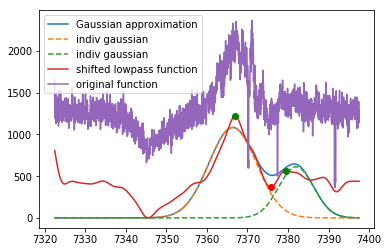

2915.9973021235874 1625.4894812636119
1310.4551349678372 375.8645213804051
1128.2713025878086 233.84619404711344
1046.5781664782244 209.3419839218754
994.297725481862 200.22879603232386
969.182025921081 192.9253105895287
1005.2412194140215 180.3132484675457
996.3042953258762 160.67829878628396
925.9326370802185 140.8173018622048
lpcutoff: 0.0081
[1392 1615 1909]
Finding first minmax within 0,1503
(3, 2560)
[7363.28369141 7369.82226562 7378.44238281] [1135.97431962 1145.91557676  826.18179147]


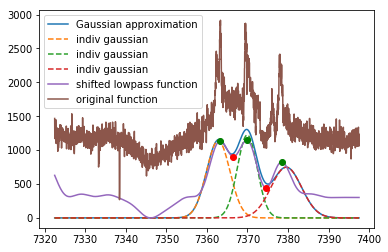

3087.9977766050365 1660.5503555739224
1365.4544422602526 555.6583363772679
1029.7714923563462 282.463706433775
778.0448053322293 193.7007215816143
756.8996500298367 169.37044230057046
791.4601163646435 160.28092757504615
823.3111915428772 155.07118547352493
841.7366086179495 148.75608649716008
lpcutoff: 0.0071
[ 768 1501]
Finding first minmax within 0,1131
(2, 2560)
[7322.47021484 7366.47949219] [ 484.09200371 1377.26214648]


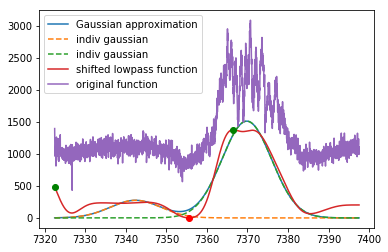

2510.9972631286323 1537.257605776444
1061.0599866976627 265.2943305838119
931.5511107205107 236.65013630046482
883.0739411746983 171.07372733143143
839.8211929146237 150.51017750355697
745.9346368635861 121.22585707740792
lpcutoff: 0.0051
[1535 1913]
Finding first minmax within 0,1705
(2, 2560)
[7367.4765625  7378.55957031] [785.50728062 947.62608099]


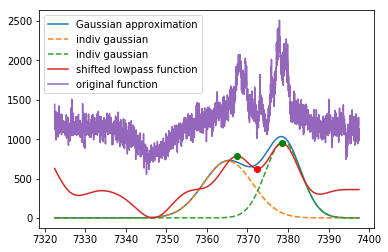

1986.9969554466336 1502.7052657483139
347.00550066395454 231.66860087145446
291.916294440387 148.23620041186805
330.4831676287963 97.90396321998551
lpcutoff: 0.0031000000000000003
[1393]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [747.7219307]


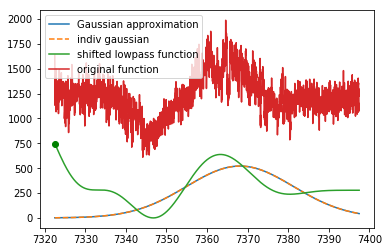

2715.997094575495 1582.6253874231745
1233.7717039713157 265.4687084160154
1115.0221352432534 181.20942074585966
999.9323360572107 135.49573480940546
lpcutoff: 0.0031000000000000003
[1390]
Finding first minmax within 0,2560
(1, 2560)
[7363.22509766] [767.99760747]


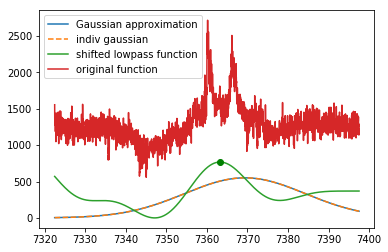

3539.9965750188144 1545.6857635037086
1962.967991752551 529.1133531126198
1666.2413191313647 309.3820057716732
1376.4605500831026 212.12703245427676
1254.0434155631115 176.84627415932692
lpcutoff: 0.0041
[ 497 1623]
Finding first minmax within 0,1160
(2, 2560)
[7322.47021484 7370.05664062] [ 668.19283192 1441.03922234]


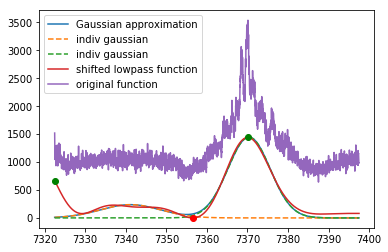

3222.9978626184948 1679.8190911613492
1620.8515977723177 387.9686248464414
1439.0977371083886 280.8733401231496
1324.675980279156 255.8812003128624
1235.4668381340678 236.34496940464297
1153.3352769697576 217.93546533347245
1055.651844094445 194.68597110595778
947.4379365766499 172.26123526477943
849.2105538256169 153.99530313347339
lpcutoff: 0.0081
[1374 1649]
Finding first minmax within 0,1489
(2, 2560)
[7362.75585938 7370.81884766] [ 868.22542253 1468.60977091]


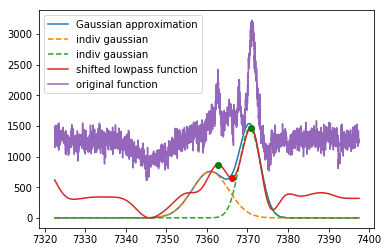

3711.9973474830085 1686.192048026707
2062.6508371447044 580.9768007978352
1651.3114401418475 460.08165266345486
1263.6797238668787 261.9626910267777
1070.5009955653054 171.47770779320882
lpcutoff: 0.0041
[1773]
Finding first minmax within 0,2560
(1, 2560)
[7374.45458984] [1789.08496513]


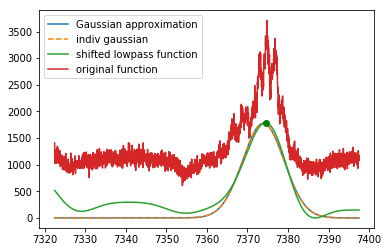

3284.9970814628396 1702.2412234826504
1613.5172242417104 415.2932582029994
1397.398823927295 283.1111401794651
1208.9364869512192 233.85523375087524
1089.2248834892016 210.83782000421454
999.2261200592416 197.52440046622237
919.1322779480706 184.25614483067983
850.8233365550723 173.0831921753465
797.5932628890364 165.82971624904124
759.0450617798024 161.78928715729407
lpcutoff: 0.0091
[1684]
Finding first minmax within 0,2560
(1, 2560)
[7371.84521484] [1541.18444281]


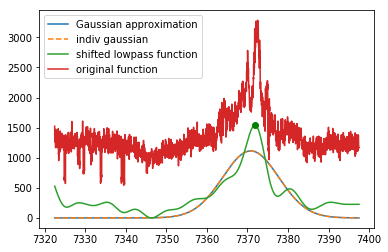

2497.9972903691087 1407.511696765473
1139.5058395250066 322.95836795462634
955.6597148954613 163.60072780044032
783.0839383036648 111.82875133452362
lpcutoff: 0.0031000000000000003
[ 669 1597]
Finding first minmax within 0,1077
(2, 2560)
[7322.47021484 7369.29443359] [381.32402187 838.12186985]


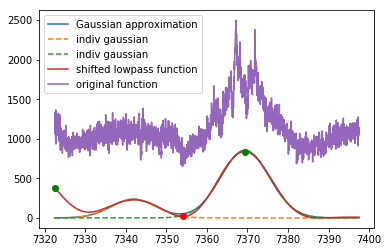

1939.99685204615 1455.9729309589004
454.73252135900157 203.96138526681148
393.25954873447836 135.24384055530808
428.16914564865215 76.575622468172
lpcutoff: 0.0031000000000000003
[1434]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [692.140868]


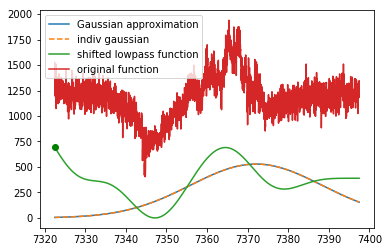

3574.9970152708183 1842.8009118065058
1731.361840750373 535.4075937723983
1404.5751643575368 371.9323726023186
1155.863825685159 249.57272997146242
1093.7905255227174 216.00726086083102
1039.4723159434975 197.24733210566123
982.2297296978963 186.4105620097122
931.5727331772337 178.39674443018
lpcutoff: 0.0071
[ 630 1808]
Finding first minmax within 0,1098
(2, 2560)
[7322.47021484 7375.48095703] [ 497.09497664 1600.34379324]


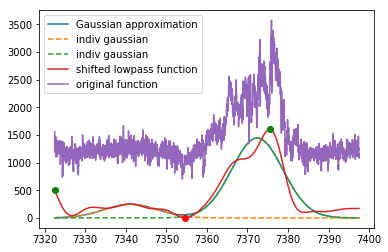

3161.9964960452157 1841.5749919479674
1234.031443681338 633.3297557778986
888.8209818129112 299.51351256752986
586.6000565085906 205.94475891219557
512.0644412255965 173.71807435475412
533.4819964222911 166.48464532598243
568.6362800670495 158.11036583267958
576.8613557211875 150.85573537820972
lpcutoff: 0.0071
[ 870 1510]
Finding first minmax within 0,1097
(2, 2560)
[7322.47021484 7366.74365234] [ 583.85731619 1568.92048894]


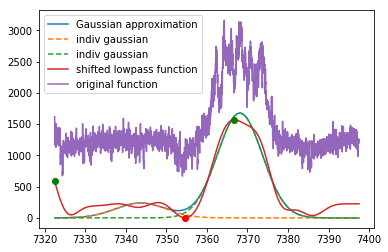

3936.9979256024444 1772.6854206283454
2141.8987140411577 645.011975597988
1777.592702201926 399.64896455849214
1498.0230564023145 333.5396524664177
1276.9530718703868 268.330832739473
1091.895679625673 218.15950334874512
942.2192418840868 176.87587159110853
lpcutoff: 0.0061
[1636]
Finding first minmax within 0,2560
(1, 2560)
[7370.43798828] [2158.5248952]


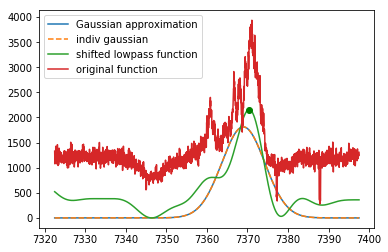

4454.998671729187 1991.0043828855366
2450.363603968549 734.2930747250067
2014.4943956397442 459.7214519774982
1608.5104147135457 366.01653787304235
1378.9434154612181 269.9003510873478
1191.3341007922513 222.28674583749367
lpcutoff: 0.0051
[1687]
Finding first minmax within 0,2560
(1, 2560)
[7371.93310547] [2288.09900648]


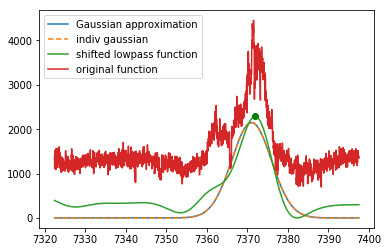

2671.9967817833594 1529.5664651514264
1077.8115737965259 360.0298489325909
1064.0296167032593 225.0991710560862
913.6231527765101 172.58923086302772
843.5580615167269 143.664109770684
795.836951542997 129.72203833133582
lpcutoff: 0.0051
[ 785 1434]
Finding first minmax within 0,1076
(2, 2560)
[7322.47021484 7364.51513672] [699.08124777 972.72796182]


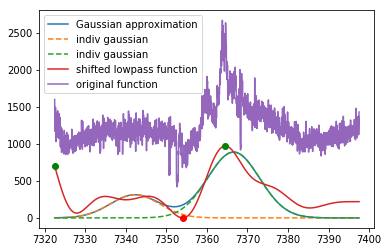

3072.997807945943 1662.6921114845622
1452.0280846600301 425.2929711803991
1183.9254127204563 266.19318820891635
992.8095979629811 217.37836438238554
833.4891007166084 174.2215558452401
722.8935578524706 151.98586159008522
lpcutoff: 0.0051
[1605]
Finding first minmax within 0,2560
(1, 2560)
[7369.52880859] [1563.04427785]


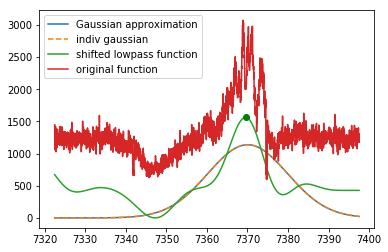

2280.9968533821416 1679.87445574355
573.4644346691166 332.2264618040735
530.0118511673923 197.8792642649975
429.15503050248753 156.12933093516256
449.1447073398781 137.26797239049682
444.0492939372359 124.39114106422102
421.4698633753676 117.93354074367959
391.8425374190881 110.88595367433206
lpcutoff: 0.0071
[ 660 1536 1818]
Finding first minmax within 0,1114
(3, 2560)
[7322.47021484 7367.50585938 7375.77392578] [665.9290688  815.18688609 689.59971093]


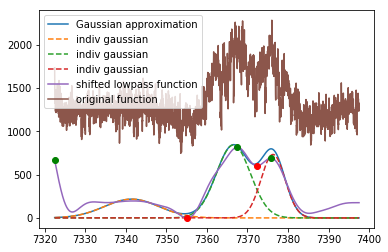

2766.9971779790053 1666.349232382365
1081.202092176915 282.75008836163346
1022.8296258076225 203.46087032239674
1001.3147254416917 180.06414220073495
927.5580473823204 163.37157176708058
852.3919086953813 145.97293464392138
774.6066827678687 124.452603511255
lpcutoff: 0.0061
[1615 1965]
Finding first minmax within 0,1837
(2, 2560)
[7369.82226562 7380.08398438] [1100.20266362  584.20876256]


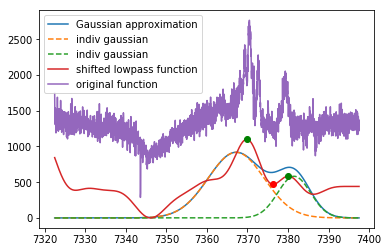

2228.9972037575585 1603.8641275010193
547.1871667909222 234.16706303082293
494.47674003590896 154.51885231730066
523.0362100053858 125.64743219137249
516.0445844340909 107.47883893307107
lpcutoff: 0.0041
[1617]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [769.3588047]


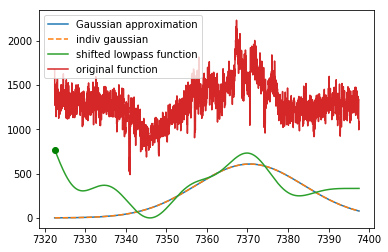

3609.9964962721247 1710.037860286253
1926.191994137013 514.621097951607
1668.3276661254502 338.8101302584556
1438.7303441804474 277.3603085091688
1263.5655484845402 232.25428013771534
1114.668884770273 199.04985727159968
995.2989946489151 174.3313996619229
lpcutoff: 0.0061
[1531]
Finding first minmax within 0,2560
(1, 2560)
[7367.359375] [1658.76731769]


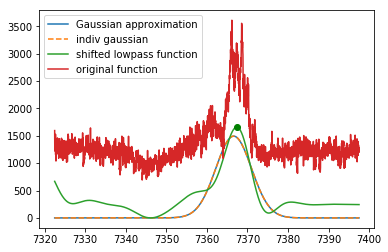

4585.997042721544 1873.8487725917955
2668.720758030312 628.1519854194391
2324.3613921401666 399.7206435496764
2049.401684246186 335.34529085181265
1833.628623126297 284.5645356985873
1677.7435902676802 256.08745414512964
1549.448634739509 235.1237289038489
1433.3718271212374 216.99067480790808
lpcutoff: 0.0071
[1650]
Finding first minmax within 0,2560
(1, 2560)
[7370.84863281] [2312.14146411]


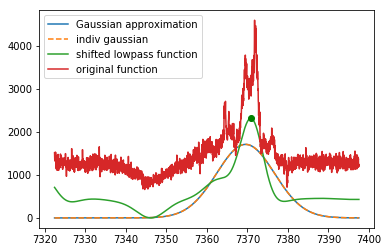

4141.996549325933 1963.0486253086137
2098.162255584247 734.4147521732569
1689.5540593329565 428.3965937557396
1340.002374924451 339.8797581420352
1244.6002908783057 310.39941723634547
1167.041665415874 279.19478660333107
1025.4516740258891 238.83660121760062
874.412395327272 202.64167046612909
lpcutoff: 0.0071
[1539]
Finding first minmax within 0,2560
(1, 2560)
[7367.59375] [2259.04245147]


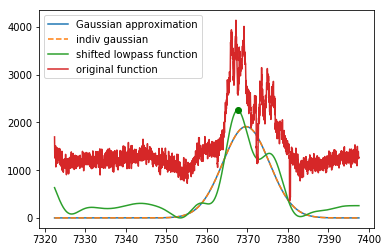

4576.9965628672835 1931.4770959321677
2499.998720607054 782.8955791322243
2074.865151327406 423.0290488651813
1817.2723926602112 376.0006733969941
1713.1238480458342 361.8095958626914
1615.9481362604752 348.0419022352972
1499.8345865852175 330.75305510505086
1398.3224313750002 317.1375960086733
1342.8376431468523 308.45618831334895
1329.6175207124197 300.5437016692193
1325.19713478117 291.17700041690085
1294.5725042410636 280.4380940838775
1233.5154828380455 268.93460206232913
1154.922739458434 257.2710002179137
1069.8247019191508 245.8448614392698
984.2632676589578 234.62667440861705
900.7280492012874 223.41422411661878
lpcutoff: 0.016100000000000007
[1596 1827]
Finding first minmax within 0,1689
(2, 2560)
[7369.26513672 7376.03808594] [2879.68307679 1412.41229331]


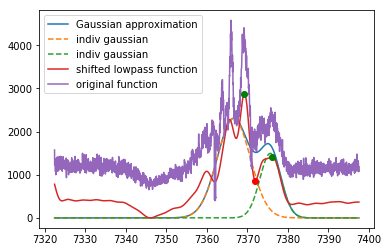

2947.9969532798955 1720.7455228153676
1215.189962935789 438.12465243573877
977.8053234076435 259.5542233805449
813.1019509089078 189.3736999725602
817.711034623992 176.23660451495454
817.8217148576118 164.26039767632514
775.5812244050912 154.68520035943916
729.9591402921114 146.9866992339705
lpcutoff: 0.0071
[ 824 1523]
Finding first minmax within 0,1056
(2, 2560)
[7322.47021484 7367.125     ] [ 450.12879185 1175.87363336]


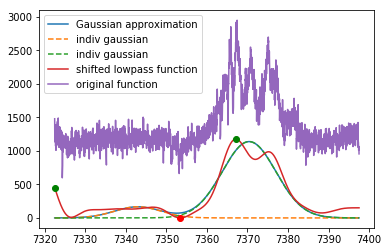

3797.996710784503 1723.5018665057987
2043.8571620855157 483.7722406193021
1751.821007757833 280.0392773612479
1575.2937069170703 233.20050967266008
1475.7519950229207 217.5970281912081
1393.6867830282154 204.25739298815355
1305.1283517598458 185.67554459505664
lpcutoff: 0.0061
[1623]
Finding first minmax within 0,2560
(1, 2560)
[7370.05664062] [1693.73261086]


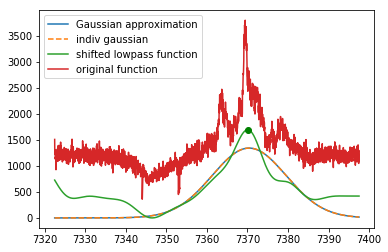

5428.9967520755845 2157.985215244551
3098.310366424515 1008.6396109734889
2474.1812411490687 600.5102392839739
1913.8028847635214 393.2027692480028
1670.0237489635729 338.2564348987439
1504.0258360051716 309.1991433771002
1364.2192160220584 288.16349020026945
1269.1729246051618 277.93610664187423
1219.349473177659 272.647565233546
1201.9192193926365 267.8354389409611
lpcutoff: 0.0091
[1629]
Finding first minmax within 0,2560
(1, 2560)
[7370.23291016] [3279.21457924]


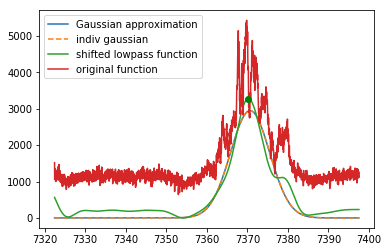

3008.996940018657 1661.9488818233126
1354.9240411105245 432.62755786096085
1123.0052689834702 223.57756212061435
958.4352220226597 173.31893891219497
864.0631591330052 153.09670900346012
774.7258707565165 134.72983422985132
lpcutoff: 0.0051
[1431]
Finding first minmax within 0,2560
(1, 2560)
[7364.42724609] [1318.24700326]


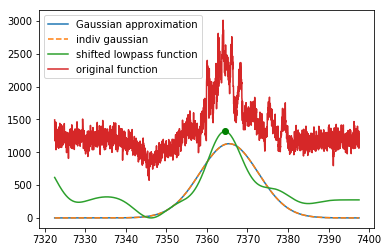

2915.9964914320503 1676.2958633602827
1303.7896748477365 341.73913161477935
1183.0229327113873 246.55811605976487
1081.1329022482746 217.82120556997546
980.0358484160404 177.99990860611325
885.9603607638153 145.59312308415554
lpcutoff: 0.0051
[1517 1999]
Finding first minmax within 0,1788
(2, 2560)
[7366.94873047 7381.08105469] [1105.56461529  669.29084858]


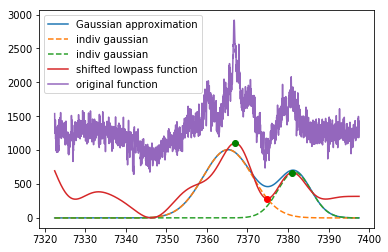

2310.99698339065 1693.491088368931
737.8035987766261 224.32390261802306
675.387950631078 174.1406680866902
695.8953534772568 148.60731635102323
686.8472517514201 139.24372461617918
644.6277976991696 130.8543188358228
614.0768870612417 124.74312511154557
602.4106854257066 121.4015016257593
587.3561678441938 117.98569846099771
567.5213288012405 114.32033695551345
lpcutoff: 0.0091
[ 256 1428 1852]
Finding first minmax within 0,792
(3, 2560)
[7322.47021484 7364.33935547 7376.77099609] [677.93908736 808.65770437 784.84049881]


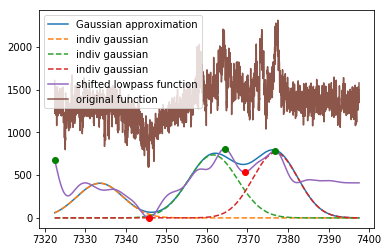

3537.9971473498513 1829.385750792421
1659.6168196842045 535.028416400195
1363.483786069075 308.30417811856887
1157.4978508161757 239.33062166705
1049.222118305317 210.4084876488887
1008.6391058331169 204.87482368631493
974.0583017908052 199.1365645324331
924.4996908702465 190.14761786157186
860.4719931310369 177.18436389687847
791.8209387411302 163.81807249747678
lpcutoff: 0.0091
[1675]
Finding first minmax within 0,2560
(1, 2560)
[7371.58154297] [1877.41750717]


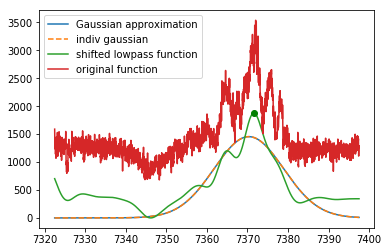

2702.9963451420863 1513.9577174708731
1160.785210415705 461.2561226710903
912.0119482442472 215.19799662803942
677.6875966068328 130.80989022040012
lpcutoff: 0.0031000000000000003
[ 667 1567]
Finding first minmax within 0,1052
(2, 2560)
[7322.47021484 7368.41503906] [ 521.54255386 1152.50471996]


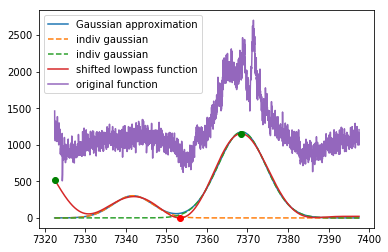

1848.9965428022517 1533.5662012579592
207.97512998643288 145.20036464671085
171.1940950083797 120.48423496778297
193.14876419484472 89.66976027693805
lpcutoff: 0.0031000000000000003
[1405]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [638.24057627]


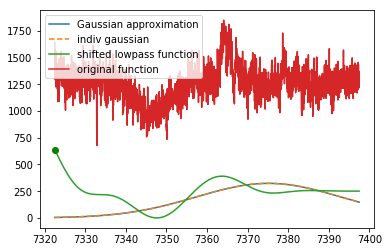

2085.997424345547 1528.4597037209944
584.838605834484 165.19756207294702
538.8225930117549 146.27960888990086
550.2089892752269 130.95570803821943
539.8814136299918 114.97442882669573
536.0765925804749 98.94664109936829
lpcutoff: 0.0051
[1483 1960]
Finding first minmax within 0,1728
(2, 2560)
[7322.47021484 7379.9375    ] [622.19905657 472.65954496]


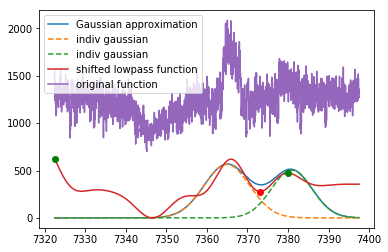

2424.996434330698 1533.6404626674293
856.5136308181479 278.5947948361682
809.7909347498257 156.10584153115138
709.7051227424602 109.56027962302898
lpcutoff: 0.0031000000000000003
[1537]
Finding first minmax within 0,2560
(1, 2560)
[7367.53515625] [854.47736311]


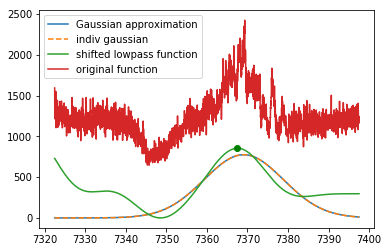

2363.9969437242503 1582.6725602064791
850.6672344949693 256.544014516048
799.1225070002076 228.5933374509472
748.44534779893 173.7701723521279
733.3966988874513 166.00967293697505
716.6819340313914 156.6068729978013
691.1239451764791 148.46754997880834
676.2669847370009 141.60700161767485
677.7838979291223 133.95042160423205
663.2598191009617 125.21348608618561
626.2995313491367 114.92151979825546
lpcutoff: 0.010100000000000001
[ 746 1317 1585 1987]
Finding first minmax within 0,1122
(4, 2560)
[7322.47021484 7361.08496094 7368.94238281 7380.72900391] [594.30759724 468.57310008 705.93428763 805.04222352]


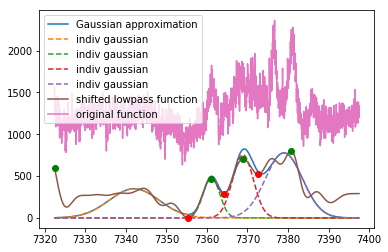

2781.9979847588183 1606.3766845909747
1262.0752505889602 342.20215209462043
1047.830999371368 238.43202802545488
892.5095955519755 162.870426513359
886.2727249182217 151.23270396659004
876.7786220787925 142.36153824774905
843.2902368384034 136.03746754810072
lpcutoff: 0.0061
[ 601 1775]
Finding first minmax within 0,1172
(2, 2560)
[7322.47021484 7374.51318359] [451.9859827  973.53610861]


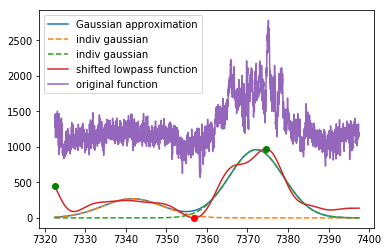

3757.9964990766002 1821.5424655976656
1898.1182462989939 564.5466796959138
1581.8177124289004 359.48887908062
1304.7663626446465 264.1150986518274
1126.9649417637384 212.50683716946244
1011.7822899124831 189.74142856874374
930.5177660864106 176.48059747838002
lpcutoff: 0.0061
[1701]
Finding first minmax within 0,2560
(1, 2560)
[7372.34375] [1912.53205405]


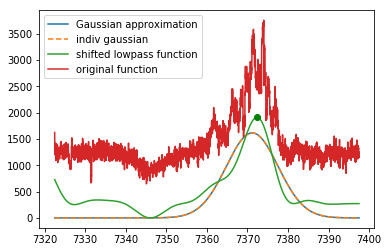

2321.9975290043144 1415.8485665486805
981.2800146087809 311.76600285829034
775.698690614139 217.92972884587175
635.558011483045 138.93437794238244
629.8966694199764 123.51810318268146
642.4663183863179 108.82464413245076
lpcutoff: 0.0051
[ 768 1780]
Finding first minmax within 0,1106
(2, 2560)
[7322.47021484 7374.66015625] [412.9977192 846.4121266]


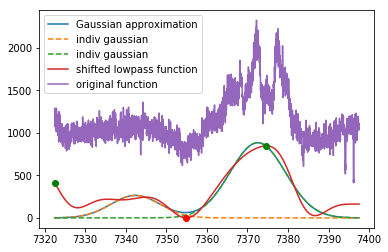

2377.998778287119 1576.1810594132069
918.7749549515422 275.62074795945944
733.2382151285885 140.53938905767123
616.0101868335928 97.62020073786248
lpcutoff: 0.0031000000000000003
[1443]
Finding first minmax within 0,2560
(1, 2560)
[7364.77929688] [816.91909596]


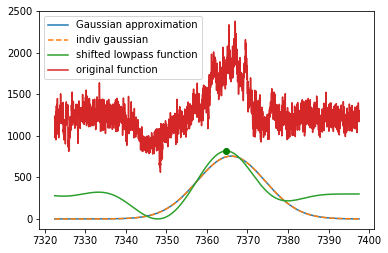

2546.9966750525127 1580.133277930933
954.5418084648134 434.20165416639
751.9740198807715 222.97679607069216
565.8516046094935 170.7903296816588
519.4238407313778 156.7410384332737
516.451279817865 151.56067243321473
515.8615895460966 146.3311281924326
501.5352656000184 140.82047337353677
482.1404515108652 135.66901664292467
470.74272462761655 131.07977810118632
470.02639750694334 125.80674276604964
lpcutoff: 0.010100000000000001
[ 731 1513]
Finding first minmax within 0,1075
(2, 2560)
[7322.47021484 7366.83154297] [ 493.40565233 1102.42720996]


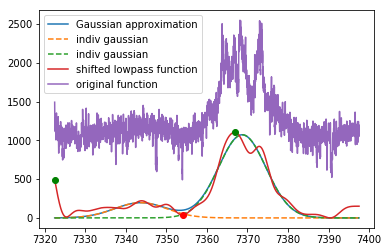

3213.9965011497256 1647.3196096436704
1633.6458964661342 358.4879270708561
1473.3889809506682 217.7615087672727
1330.8006346746386 188.86464890940468
1269.8987075446598 176.53593280513832
1207.4475634894463 162.5148031518623
1143.8089982952843 151.2893267644749
lpcutoff: 0.0061
[ 657 1589]
Finding first minmax within 0,1011
(2, 2560)
[7322.47021484 7369.06005859] [529.55358392 985.09871529]


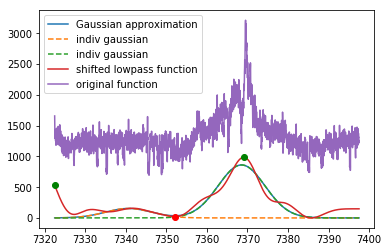

4584.996566650311 2007.473431003768
2508.7041719663716 671.0195667673315
2119.525142552455 449.808212529351
1838.0216131906882 348.80233389053427
1692.856605896428 326.6499579826838
1576.9286201806185 309.10043135116285
1488.851311214209 293.42890670279274
1460.7451112279168 280.1130698242774
1460.7698209026516 268.4341452537075
1449.7601105286199 260.55063875144964
1428.5699771038117 256.6472359337916
1409.2063269625933 254.75199503896133
1395.1393318572018 253.42621421023682
1385.4223341282104 252.16026077761572
1379.3747906943167 250.73594856289353
1377.385357200439 248.96518634311698
1378.513416033485 246.69212465459773
1378.9510676844793 243.79901459932879
1373.1255941520299 240.17662662787072
1357.751333612924 235.7236100066282
1332.4508726265485 230.3995113233814
1298.0137259387193 224.2753656390913
lpcutoff: 0.02110000000000001
[1736 1976]
Finding first minmax within 0,1887
(2, 2560)
[7373.37011719 7380.40673828] [2457.71749475 1347.78952844]


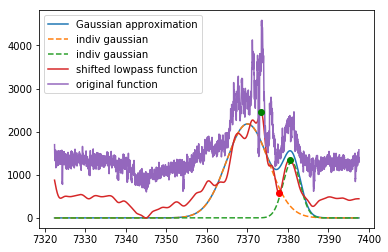

3118.996503389188 1646.356996593667
1523.7559753718438 382.50827007554693
1321.3305772956985 238.43801258252415
1148.3370101871117 185.5621235102791
1028.0517327009106 153.34123461652774
lpcutoff: 0.0041
[ 458 1526]
Finding first minmax within 0,818
(2, 2560)
[7322.47021484 7367.21289062] [ 652.82176732 1131.04742096]


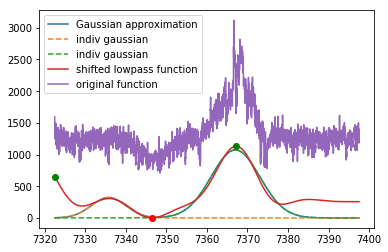

2352.9980338458963 1614.3172884836988
844.4005016418487 300.7388325741629
711.3853133880334 207.4988927464538
641.5793614622539 180.8868142915084
689.8895016091396 163.88342679127157
671.9716949732156 153.5873449590571
644.3630501639054 149.12209599135585
623.7024629475479 143.16698287346952
591.0981416560342 134.42130114030422
545.6327749539719 122.27710557617488
490.4475027995252 108.66354350838144
lpcutoff: 0.010100000000000001
[ 743 1457 1831]
Finding first minmax within 0,1104
(3, 2560)
[7322.47021484 7365.18945312 7376.15527344] [554.44874917 962.66551839 887.21701388]


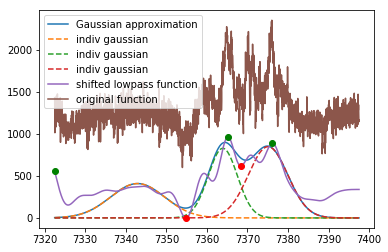

3723.99712249212 1885.484166479054
1823.1842016081753 492.2225746566148
1574.7628043349555 316.54487588516656
1425.1654495607263 277.3789812173255
1363.4173132453252 269.49050440446587
1349.725358619161 264.71231923465274
1352.5149640964587 252.75372901788606
1290.0360650640478 231.98118660138556
1185.5037396849661 209.3933426684039
1084.8453492646872 192.84011568048803
1007.353558949002 183.71620826390858
lpcutoff: 0.010100000000000001
[1284 1522 1747]
Finding first minmax within 0,1372
(3, 2560)
[7322.47021484 7367.09521484 7373.69238281] [ 820.18851197 1770.96205467 1547.39835038]


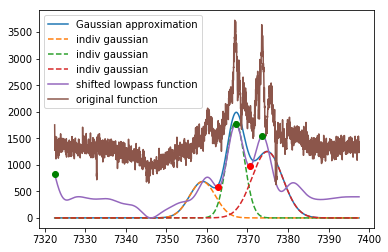

1980.9975871775966 1365.2779539394323
657.0294908869841 276.6973951927454
590.4050780953767 164.07079134254883
486.6038784807704 140.52552999098492
481.53413733293223 104.16759978198478
438.2266896649967 73.21651543721195
lpcutoff: 0.0051
[ 469 1476]
Finding first minmax within 0,1135
(2, 2560)
[7322.47021484 7365.74658203] [514.24038876 731.32294768]


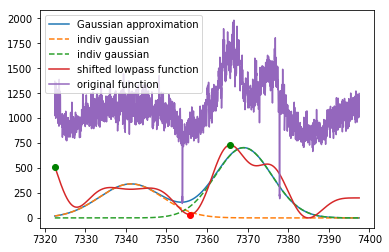

2692.9970720772126 1613.9435094737935
1105.064311879042 354.2873659937585
962.4630979376745 242.96790910857223
974.6371929834095 197.8574712529509
937.5444544424229 179.95052043526601
857.5443157264842 160.99893499136377
805.0952589357539 153.3097535714578
770.2608909038102 147.574407928519
738.4893716055578 139.7952328367013
717.0627211739029 131.36418962294812
lpcutoff: 0.0091
[1447 1894]
Finding first minmax within 0,1615
(2, 2560)
[7364.89648438 7378.00244141] [1157.60104537 1071.1452532 ]


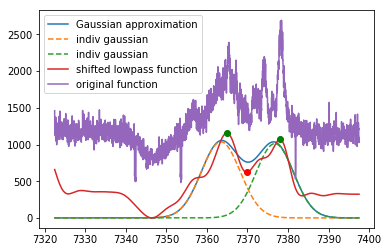

2383.9975426279975 1497.353490763433
964.7210693614368 318.1702907697681
817.6500822510513 168.83554266985126
679.2428252306713 135.05247549233405
648.2641716557828 117.94368229579872
lpcutoff: 0.0041
[ 774 1571]
Finding first minmax within 0,1084
(2, 2560)
[7322.47021484 7368.53222656] [437.34541909 759.78601061]


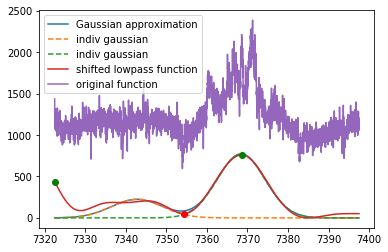

1957.9971316703768 1527.6641801633625
425.96515092646246 179.27378977757132
387.8422043501821 126.08240627139894
414.04297547960596 98.5507405542936
398.5075105047865 87.85154738279763
lpcutoff: 0.0041
[ 443 1540]
Finding first minmax within 0,828
(2, 2560)
[7322.47021484 7367.62304688] [637.42247149 560.41550113]


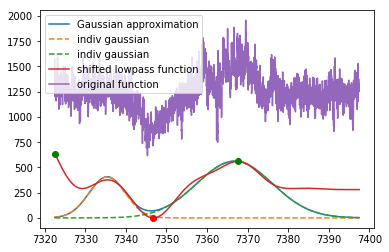

1789.9974121454318 1378.0305378277774
373.7102956907172 163.32458719817814
337.27122153030746 117.36799356114592
373.9481178565129 77.71828143276032
lpcutoff: 0.0031000000000000003
[1492]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [582.37260202]


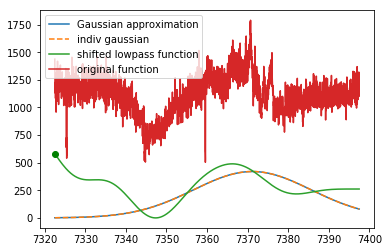

2794.9966502361835 1560.1954759053726
1267.1704934925162 410.3118000818669
1050.6189620785779 313.0582526019711
876.8810376849137 245.2461173063735
714.4259234698366 196.66672875477607
612.8679634179148 180.28214605005084
575.0261643545145 174.45244498180065
581.0307051407144 168.00371613531038
608.4140948482373 160.5443572690665
633.615141278417 150.27163338955472
618.2067655336782 138.12118639786223
lpcutoff: 0.010100000000000001
[1272 1819]
Finding first minmax within 0,1384
(2, 2560)
[7322.47021484 7375.80371094] [ 768.88122289 1452.76861061]


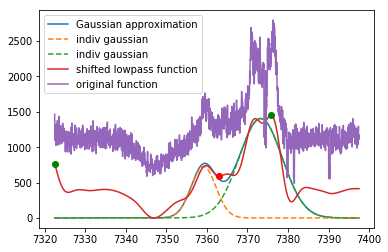

3136.9970305223324 1642.140629243831
1535.4776843763846 437.4769994518509
1329.7751493074677 253.2522895320154
1135.8244429369347 209.90455276837517
1056.1527643305576 193.87431329807248
983.2039118447469 177.66088117656128
892.7474409953256 158.5368108280601
800.8857672731342 138.90579128556223
lpcutoff: 0.0071
[ 775 1575]
Finding first minmax within 0,1078
(2, 2560)
[7322.47021484 7368.64941406] [ 530.93691915 1335.78693805]


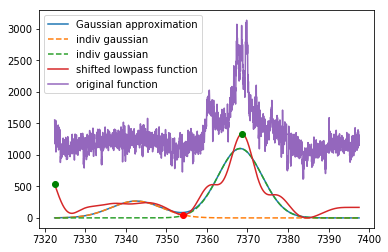

3062.9970641199243 1673.6635550666742
1426.6755901359184 413.76099629408196
1221.5463847183694 260.6121400634669
1052.971266281054 223.21419089965397
1005.0642421399043 214.08888466119316
991.9900724329286 210.4532989735167
972.3154024526707 204.74746048953185
925.2620875357347 195.32835534348965
857.1963577393462 183.06563516287787
785.5488252447735 170.83638017592358
726.2874909441744 161.00268883048443
688.5553873534946 153.22769959087844
671.8547001802012 145.55109442627125
lpcutoff: 0.012100000000000003
[ 757 1488 1717]
Finding first minmax within 0,1025
(3, 2560)
[7322.47021484 7366.09863281 7372.81298828] [ 486.71261265 1353.64186911 1076.75704915]


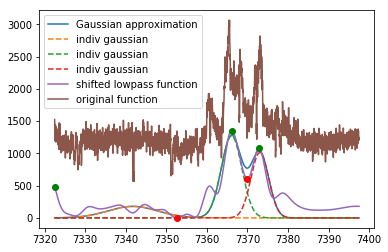

2729.9982903926343 1654.5939862662576
1149.2061829143968 375.55728114899483
919.673741271409 220.55068379023942
749.4237579511425 165.31543409822902
640.2956043596378 139.40292895728638
556.410788662784 119.4951387079644
lpcutoff: 0.0051
[1460]
Finding first minmax within 0,2560
(1, 2560)
[7365.27783203] [1251.79372684]


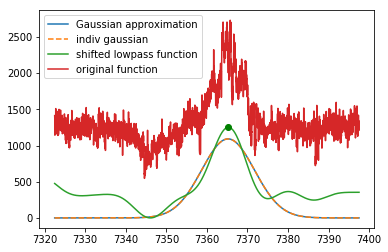

5002.9964423197125 1904.318334004294
3031.107538656632 820.1429868262557
2625.249288667076 526.3769567573084
2193.1292225500915 421.91868016002724
1931.6469769014648 369.93541667428303
1732.8695284481769 334.3922777662722
1560.5572295037791 305.4448540126341
1414.7506973176019 283.3929740533792
1305.150560263402 270.52269106838105
1235.0157121838638 264.0745910767787
1201.147805753264 260.09411727651957
1196.377723661873 256.1018885363181
1207.1600941567858 251.06385261436404
1214.9268179380329 245.1097849239038
lpcutoff: 0.013100000000000004
[1540 1801]
Finding first minmax within 0,1728
(2, 2560)
[7367.62304688 7375.27587891] [2782.64268162  759.46996077]


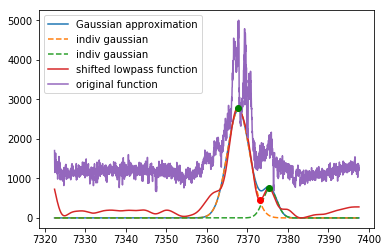

2442.996414592989 1630.3991509188568
858.7436629845226 271.7987699543086
789.0854875178984 209.34339771222022
807.508975515181 167.8491524324679
782.8944533557399 156.60251093436221
727.2911710555629 148.14103321890502
688.4023837247432 141.53860735248858
661.4982398921748 137.22255840345673
630.4678030171958 130.5898071726876
593.4956220581778 122.81037522914671
555.8117293060361 115.82582546600301
lpcutoff: 0.010100000000000001
[1385 1828]
Finding first minmax within 0,1695
(2, 2560)
[7363.07861328 7376.06738281] [ 958.31509801 1088.53679424]


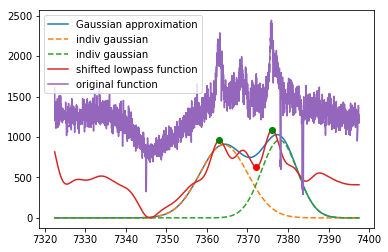

3370.997396074599 1786.872981480196
1661.7535227424203 465.56601959431225
1334.9672921359581 441.44751888312487
1160.0248103926838 273.7460026580204
1111.324420257749 255.44214589079817
1031.383718443331 227.4806795028678
931.2440143511703 207.2872394132372
863.6305749958747 196.923926894895
845.1539582643832 190.70086470049782
854.5386763952342 183.71500781772727
858.705251587518 176.90638056327552
844.9079863329057 171.4744503876977
822.5500667424885 166.5490351009256
lpcutoff: 0.012100000000000003
[ 779 1592 1959]
Finding first minmax within 0,1080
(3, 2560)
[7322.47021484 7369.14794922 7379.90820312] [ 514.01290167 1351.80548958 1569.15244327]


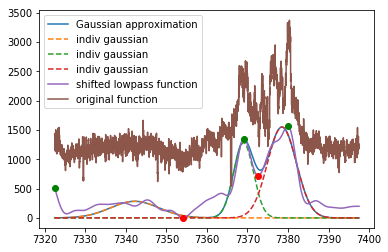

1969.9963655906236 1483.374370539114
438.82694728945785 195.4948453314251
386.43335368745966 131.16541293895878
402.52685551222953 101.21022636210446
397.45207812169997 92.61307536228952
lpcutoff: 0.0041
[1663]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [756.45540434]


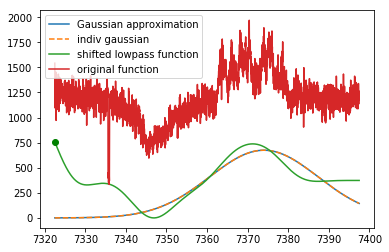

2765.9980360263166 1614.6004372157522
1173.391415203953 404.6358948320868
944.5521677337158 194.87138036845647
740.1351284856214 133.1545640739312
lpcutoff: 0.0031000000000000003
[ 693 1572]
Finding first minmax within 0,1052
(2, 2560)
[7322.47021484 7368.56152344] [ 309.2062512  1020.99592874]


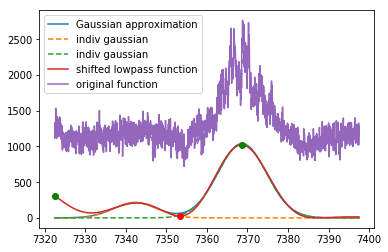

3878.9974993822016 1686.5456102362039
2163.0032331224584 548.5644081362245
1856.2499557641324 329.5007114888055
1605.2424648269484 262.26326620113565
1416.2670718275317 201.48521763572126
1256.7797283316977 157.55835958793415
lpcutoff: 0.0051
[1517]
Finding first minmax within 0,2560
(1, 2560)
[7366.94873047] [1857.24641624]


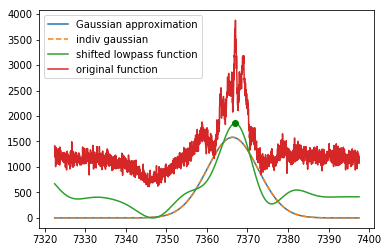

2661.9966524779625 1610.273358035951
1116.774895421679 376.53093124175797
941.6384521378952 260.1643239925854
817.1108560312741 216.59549923270734
808.3460905881659 194.46704243542283
734.8969464284978 165.29995292119852
646.5416585870666 147.41658556192056
581.3362637055857 137.34355498157433
541.6458756832917 131.9099213029105
lpcutoff: 0.0081
[ 819 1530 1859]
Finding first minmax within 0,1099
(3, 2560)
[7322.47021484 7367.33007812 7376.97607422] [ 553.53903782 1125.49356543  872.57609242]


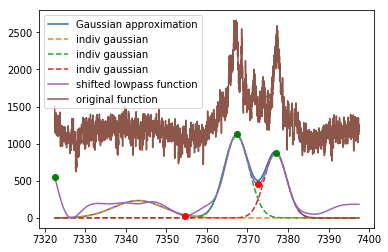

2555.996919234505 1593.4520120972663
834.5929638075381 252.6018662253057
790.1072165075661 202.78663966475244
811.2072904833847 175.17731045431944
799.0878702007776 154.00466340867308
797.7778923959213 128.17082015781378
750.8077515227205 109.98713899830535
lpcutoff: 0.0061
[1556 1978]
Finding first minmax within 0,1787
(2, 2560)
[7368.09228516 7380.46533203] [888.04907504 534.50268433]


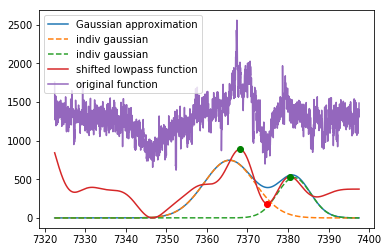

2443.9966297705655 1606.916450051616
716.9952429259279 215.34396905824318
664.469349092268 204.06609830202208
690.3720714311819 175.22855552358496
679.730103678085 142.61526466611238
678.5728408099101 128.34806078024224
680.9610178729115 111.08189675753059
lpcutoff: 0.0061
[1633 2054]
Finding first minmax within 0,1840
(2, 2560)
[7322.47021484 7382.69384766] [897.27435167 870.60576851]


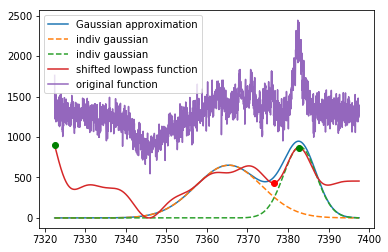

2392.996988886615 1510.7112391753224
902.4969481616779 261.85503171815776
847.1776550054815 161.6483483096609
752.5530419621696 109.99142468557287
lpcutoff: 0.0031000000000000003
[1403]
Finding first minmax within 0,2560
(1, 2560)
[7363.60644531] [749.31201216]


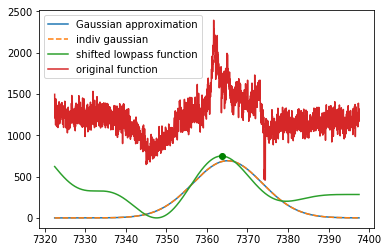

3788.9984541393815 1776.8268782509483
1978.0372034449929 583.253052621004
1646.865379434019 315.54833127034783
1354.9542064015473 238.3969741965475
1212.2026753735722 210.00776693165565
1114.9977862719193 190.42687453761684
1036.8717052847846 175.4810332161125
lpcutoff: 0.0061
[1555]
Finding first minmax within 0,2560
(1, 2560)
[7368.06298828] [1742.39091406]


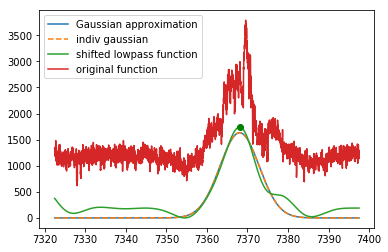

3896.994380580186 1754.1737356846268
2071.2602818871082 503.96128039428856
1993.1417814900165 357.67765356065655
1898.987947440755 331.65972401099646
1829.5152000981584 314.0583440687002
1690.5791615199687 279.93205692081364
1530.073933194814 241.0800850240302
1388.5791676851309 212.98153389073087
1279.845460867467 195.36399654058027
1192.7510509619938 181.12169584308603
lpcutoff: 0.0091
[1213 1487 1834]
Finding first minmax within 0,1335
(3, 2560)
[7322.47021484 7366.06933594 7376.24316406] [ 934.29303355 1796.89979487  921.79344295]


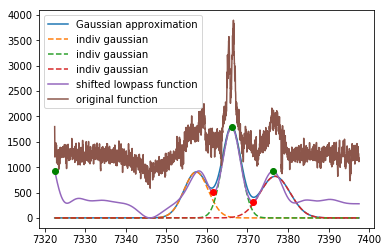

3511.9968765585904 1613.3141089168962
1884.8105746396814 589.7532445729892
1548.0548653849576 358.9123418227052
1201.8302091159126 255.58038956807502
1034.4617115854435 208.9428268534295
918.482653952266 180.6871936046745
811.2187691170157 153.4133254091331
lpcutoff: 0.0061
[1586]
Finding first minmax within 0,2560
(1, 2560)
[7368.97167969] [1854.1343752]


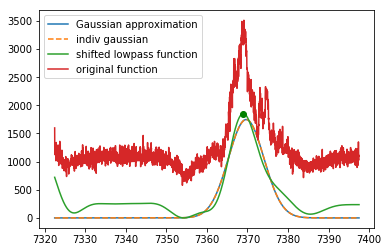

2163.9964910640733 1588.8075818417442
401.2909057784327 260.220261503359
359.3032369821044 189.9535758050228
388.27756600567113 140.6365616314117
379.64304100314394 121.28566100431101
380.53890660841716 111.76841852661111
384.1949140242664 105.18909754892191
lpcutoff: 0.0061
[1505]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [857.22911769]


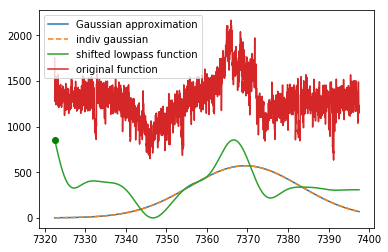

1721.9965032059577 1284.446248088821
326.035623863467 189.64954410799814
347.11854937391763 119.30536397855484
333.89360948151875 94.72275249800653
330.1749253681544 53.65347062560698
lpcutoff: 0.0041
[ 594 1711]
Finding first minmax within 0,1094
(2, 2560)
[7322.47021484 7372.63671875] [583.56811392 524.81931177]


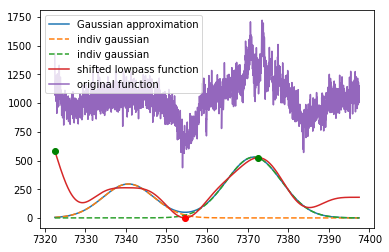

1799.9952060152514 1495.353349454703
4.47383963762536 190.3186648233221
31.476272282734044 165.3419797846066
8.8653536037923 118.56258148872196
16.07131321794236 100.40594218258126
17.339160637221767 86.0462901417291
lpcutoff: 0.0051
[ 382 1570]
Finding first minmax within 0,825
(2, 2560)
[7322.47021484 7368.50292969] [857.21476491 432.33468961]


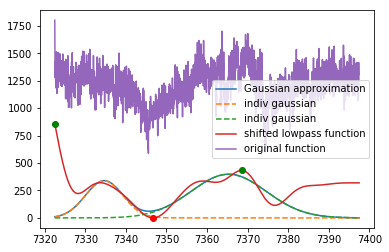

2139.9968745896845 1491.889001488998
518.8581792460661 263.27231975503145
525.4988676167579 161.82517076372739
507.65705868451687 116.82508267339364
497.23138860006156 102.75575416393178
lpcutoff: 0.0041
[ 549 1640]
Finding first minmax within 0,1120
(2, 2560)
[7322.47021484 7370.55517578] [676.73822441 683.12198182]


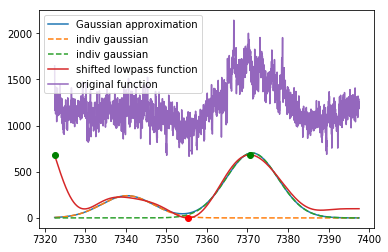

2326.996770289813 1439.6854991490009
885.8596563741266 266.39669631452523
838.4673320576082 177.12757226342302
755.6345034521423 137.73751511722585
723.9921400422891 132.99622231205902
689.3316119116414 126.24952376485277
656.3410801696432 119.87805202551597
621.3836268532546 112.10765436977297
lpcutoff: 0.0071
[1453]
Finding first minmax within 0,2560
(1, 2560)
[7365.07226562] [965.14641289]


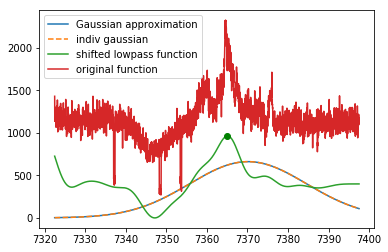

2334.996531925432 1521.4605593357528
842.5550487924363 280.8241609934866
766.7583702251736 174.0799304071508
684.5875296344086 136.2313929448071
647.9605982920259 128.01479129442103
611.0296219375318 119.0600270883835
567.5714667041011 106.37540956831714
lpcutoff: 0.0061
[1330]
Finding first minmax within 0,2560
(1, 2560)
[7361.46582031] [962.42707128]


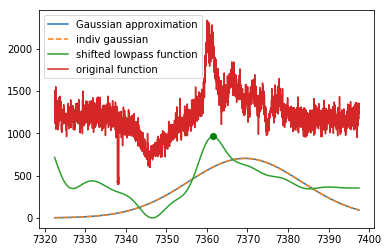

2576.996858470635 1614.0048081971433
964.7201220193599 297.1550958197469
866.5798721449555 197.88286888213204
807.9885605067952 160.86621847896015
737.0909548620489 134.7430539990278
667.4567678227384 120.95004754138228
lpcutoff: 0.0051
[1550]
Finding first minmax within 0,2560
(1, 2560)
[7367.91650391] [1127.17590637]


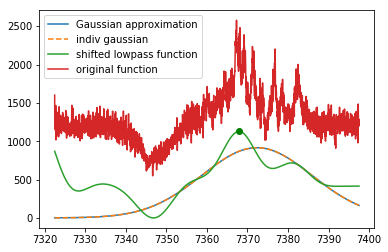

3952.997185343805 1905.7472136787335
2016.8111368315301 690.0455709002931
1586.8005192679962 478.7274450504821
1179.1279783158539 305.36093406654123
1009.5138768354586 257.36652690513665
924.6162035852881 237.7879539235453
870.6373213993747 223.4383344848815
837.2997551922817 215.61859631269056
830.7371545984452 210.17833692758745
847.7060874036133 204.43425441770415
868.8270224997714 198.38016821470262
872.9968079001615 192.9965880479665
lpcutoff: 0.011100000000000002
[1619]
Finding first minmax within 0,2560
(1, 2560)
[7369.93945312] [2118.30117053]


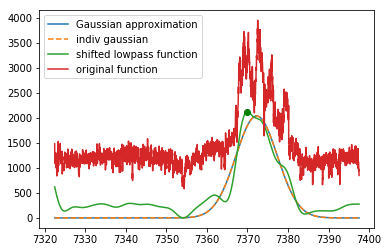

2746.998045385447 1649.1415222194837
1203.8942091609547 302.8550700476273
1064.1399184589359 216.601878844168
1003.1899316455867 202.464655094468
934.650372559383 187.1797556793993
868.4280381012925 177.8501335230737
806.6128580739503 169.0791992070669
756.766785631678 163.33323262011453
706.1321303860277 156.03767377145857
650.8740401587811 147.7684947727492
596.9363054603796 140.32258260945557
550.0500720248647 134.44479535655609
lpcutoff: 0.011100000000000002
[1277 1466 1670]
Finding first minmax within 0,1372
(3, 2560)
[7359.91210938 7365.45361328 7371.43457031] [ 721.50506551  729.43849267 1307.11081492]


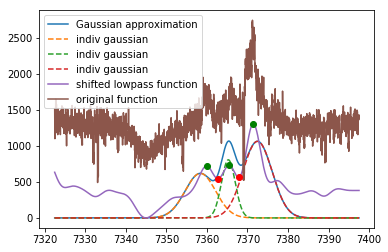

2557.9969755916777 1446.9187837880793
1148.8856891296698 336.42245361812735
1020.4988184307392 192.3037734905967
871.1528125366758 153.30911771454083
851.9683850782446 131.7572691532324
832.0606465778824 116.2149215054124
lpcutoff: 0.0051
[ 743 1536]
Finding first minmax within 0,1137
(2, 2560)
[7322.47021484 7367.50585938] [550.83384057 864.73741195]


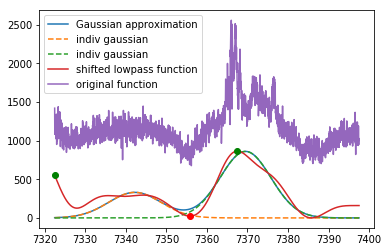

2685.9979827971715 1465.017480589664
1340.7836006809512 333.34671895972735
1137.0496075791539 231.45097134567203
991.1909635738691 174.64959225982878
873.7180390176891 129.41725529296565
lpcutoff: 0.0041
[1532]
Finding first minmax within 0,2560
(1, 2560)
[7367.38867188] [1000.45649347]


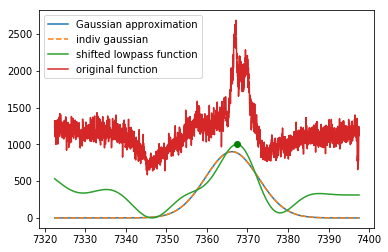

2755.998516266417 1762.9709151416162
1211.1813736564714 288.8915149832338
877.5952653531697 257.63881101959424
864.3408947531107 211.9826031520477
850.8461298815098 197.37313873535692
860.3361404607335 189.2369450679912
836.5721899847492 184.74031838703644
821.3711168917296 176.04736634811707
796.9933084857537 160.29369236430662
746.9511451639119 141.04290022627114
694.5181358872978 126.35618815320392
lpcutoff: 0.010100000000000001
[ 752 1690 1927 2118 2340]
Finding first minmax within 0,1080
(5, 2560)
[7322.47021484 7372.02099609 7378.97021484 7384.5703125  7391.07910156] [ 462.4643782  1043.91806853 1078.69368484  975.26718266  734.01222789]


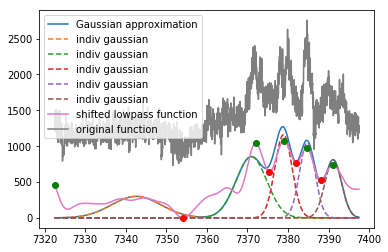

2665.998611588629 1593.480097924795
1123.7335751093403 395.3952551381858
894.0958462941339 208.05455225164079
706.311573665588 161.76060156267962
649.5876929303702 144.4561559741959
607.8422633306468 131.98140862212932
lpcutoff: 0.0051
[1593]
Finding first minmax within 0,2560
(1, 2560)
[7369.17724609] [1101.23072077]


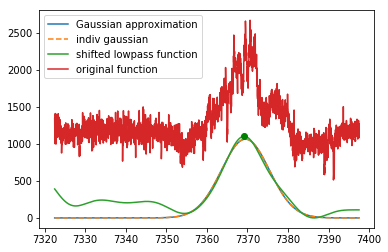

6111.997636693694 1821.9852353467707
4236.844098784815 924.9589831194738
3739.6444766339514 617.5479515429289
3210.1910574282233 485.50094881167354
2895.1163429458625 415.30092708709486
2665.5928797828724 378.4303187409927
2487.3166631135005 355.02943357322357
2358.96772766538 342.3336410988537
2263.8255302376324 331.99172126384207
2182.843463790271 319.51400950698667
2101.710052229096 303.4992527185914
lpcutoff: 0.010100000000000001
[1647]
Finding first minmax within 0,2560
(1, 2560)
[7370.76025391] [3199.19060925]


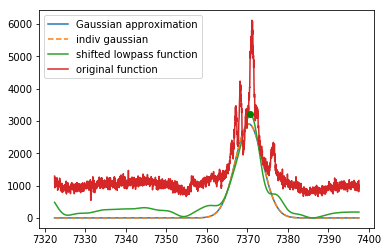

2289.994831121059 1634.0502031023436
461.3631181426192 264.9057839666853
422.60578628663575 216.59166285858774
456.6408984757352 185.75040632253157
457.78910677372687 167.89889614778417
468.63767359898156 157.44641152169297
479.18827065444134 148.13292848327404
482.48461368013363 142.5755955967822
474.7629284527245 138.03182537565712
473.5846888818819 133.91471503388536
472.56679669808545 129.70350188610678
462.29674664032837 125.30923887175622
443.9794442429279 120.8007420575123
422.394739194094 116.36105072629093
401.0480684156946 111.94060026776147
lpcutoff: 0.014100000000000005
[1266 1603 2076]
Finding first minmax within 0,1363
(3, 2560)
[7322.47021484 7369.47021484 7383.33886719] [ 894.79443212 1046.53814484  799.18565974]


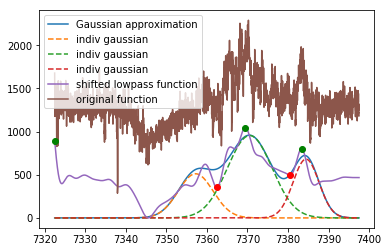

2530.996463175693 1558.237659173203
878.6391251576836 314.5415979125714
838.1776741457475 184.03161781150712
793.090070325216 148.51399537454148
754.0060092208589 134.74296272212342
716.9488607813737 127.33164096256671
680.7602888393321 120.17225096834107
lpcutoff: 0.0061
[1505]
Finding first minmax within 0,2560
(1, 2560)
[7366.59716797] [984.76201857]


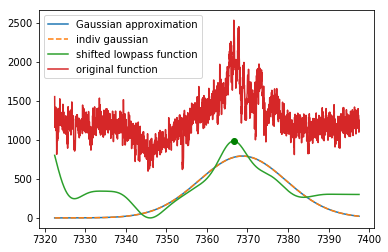

3598.9968237796643 1586.7158361873958
2126.559794522728 479.141799079697
1698.667784429532 463.6763756128917
1406.3970697974105 236.5150798722853
1238.7378516780946 198.20808225528117
1133.4697546251127 165.17547678797516
lpcutoff: 0.0051
[1862]
Finding first minmax within 0,2560
(1, 2560)
[7377.06445312] [1653.72708108]


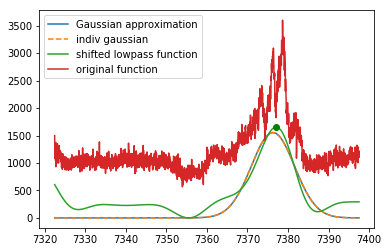

2082.99245859021 1539.0272477016715
119.69728492592026 301.0720790951361
88.57552405030992 237.28703999135413
134.11015121304877 182.72688260522696
138.89475090844462 161.30185711924852
142.75545604549347 146.47101189131976
150.6608910814632 133.7699587532428
158.33406661082472 125.26951362163167
166.78511798506702 118.64355315297298
175.8042598065856 113.71919243269778
186.04299470899127 109.45877910772954
197.5801549748121 105.09515622547296
209.93028473268555 100.51006265032554
lpcutoff: 0.012100000000000003
[ 379 1611 1922]
Finding first minmax within 0,774
(3, 2560)
[7322.47021484 7369.70507812 7378.82324219] [1024.54902309  803.59700109  673.78526708]


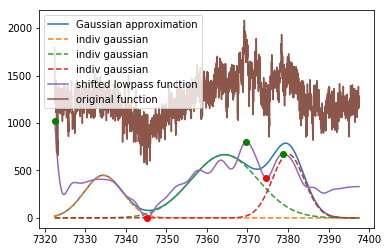

2212.9967772251525 1411.8195181916863
767.0950305736328 264.35156569751365
779.1984799974643 157.6176119461596
669.0651849828412 120.93975871723015
656.7947975649088 95.85227911523327
lpcutoff: 0.0041
[ 522 1678]
Finding first minmax within 0,1098
(2, 2560)
[7322.47021484 7371.66943359] [510.73072615 630.91064901]


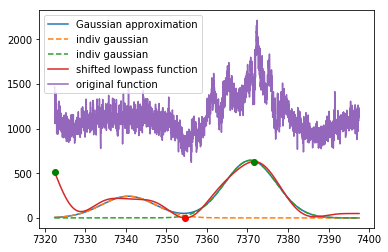

2699.9966088187716 1643.2225704179607
1131.5113512785992 390.25326209206463
915.0128686387991 274.68704718773205
718.8782525109968 214.8161982535744
677.2439144345503 178.11677887043132
669.1863846849953 158.9228845069105
628.8199526017356 141.67816387801747
574.2459622159331 126.8755146015544
lpcutoff: 0.0071
[ 490 1817]
Finding first minmax within 0,1092
(2, 2560)
[7322.47021484 7375.74462891] [ 623.6668788  1153.31284467]


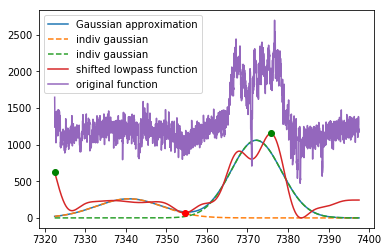

6490.9982312445945 2203.163867057895
4970.730647360326 1068.9733555240032
3594.6436122648693 859.4980804204539
2980.250736444397 939.4227277327767
2789.6246183799126 679.287909412747
2360.0362301960877 481.90711423165334
2073.722034294461 426.40457696368276
1828.9855511115984 387.0577392049587
1605.9499615071281 326.3980535086408
1405.9901168593906 270.10569946103385
lpcutoff: 0.0091
[2117]
Finding first minmax within 0,2560
(1, 2560)
[7384.54101562] [4351.53612261]


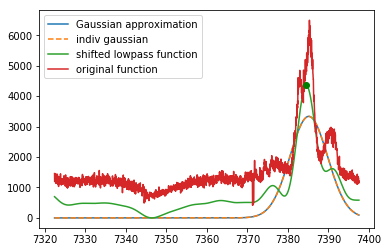

2577.998555236209 1680.1378872114897
927.5575375581345 341.06022708850713
795.9113362820785 232.00770011445852
726.1097338604991 168.2723477071539
676.69166652077 149.55156014664672
643.9492968669033 141.63207068575286
647.7402736391182 137.33155792106527
653.7210318904722 132.53866886380996
658.3806882415149 126.31602540726045
lpcutoff: 0.0081
[ 754 1274 1748]
Finding first minmax within 0,1066
(3, 2560)
[7322.47021484 7359.82421875 7373.72167969] [376.61498218 674.51805761 894.65780567]


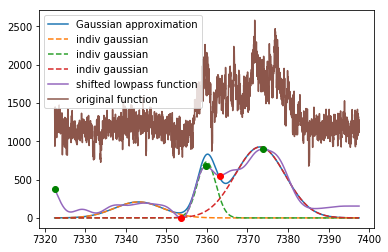

3281.997058233793 1771.8514595596234
1515.433601395164 445.4047192200875
1255.9092452761683 376.4482343708766
1084.4931764828966 222.67193662884887
1034.4792134400518 205.8442489946062
964.430615127796 182.45173663411884
889.362974711034 169.71781447343727
837.991526455658 163.11699746923347
lpcutoff: 0.0071
[1877]
Finding first minmax within 0,2560
(1, 2560)
[7377.50390625] [1527.06513572]


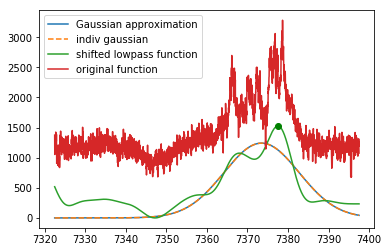

2558.997665833021 1467.8186997892255
1195.1657968407083 255.6115427119918
1173.1268427096102 228.8379484103213
1138.3944916256892 221.5276101838268
1093.7360713399896 219.5818731209189
1044.9986805062472 189.70065930637878
935.4863969074943 150.82194515093843
848.0438626424952 140.32397398095847
784.8462148770354 130.90419122603566
723.9088134867052 118.93394346594945
lpcutoff: 0.0091
[ 758 1519 1881 2239]
Finding first minmax within 0,1124
(4, 2560)
[7322.47021484 7367.00732422 7377.62109375 7388.11767578] [ 560.63680664  604.44038817  625.4920421  1007.88031792]


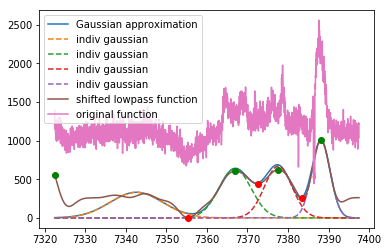

3014.9968612784783 1633.779585456152
1467.720656902778 319.6391190796324
1419.0840032883925 293.5362419935628
1406.2042672357395 271.7599786134661
1314.8173529057988 234.9467854894736
1230.7297294323957 206.20083904546286
1146.15079792752 185.63703232817673
1066.845231130894 171.57730618079776
991.4707951386254 155.9935580143585
912.8375263379248 138.95719364875498
lpcutoff: 0.0091
[1582 2017]
Finding first minmax within 0,1855
(2, 2560)
[7368.85449219 7381.60888672] [1061.61207802 1230.32390771]


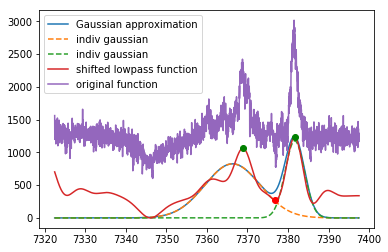

3464.9978002546272 1736.0745050371897
1807.8912769469384 469.5514428605786
1500.201305191483 437.58001734698655
1256.653181583923 250.31140802044297
1089.4598826792057 204.61310392190654
955.6164144622162 167.62215411865262
lpcutoff: 0.0051
[ 754 1851]
Finding first minmax within 0,1124
(2, 2560)
[7322.47021484 7376.74169922] [ 449.2754023 1525.7925838]


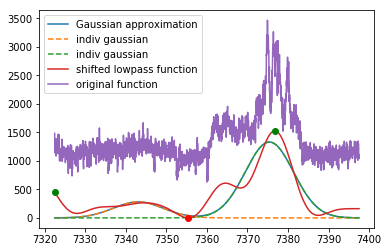

1634.9968855763748 1403.3012662854762
161.01739954822938 136.74196316887418
127.41592188016921 116.032348591742
161.24924252055803 71.81024224080309
lpcutoff: 0.0031000000000000003
[1361]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [618.29888623]


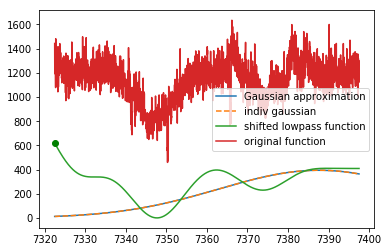

2915.9986177915425 1636.1364407498497
1359.0360523556412 354.74802358404384
1169.5100522418488 213.32421485953046
1010.7927353132632 179.0313038576754
929.5507395084153 166.4958986555972
853.4577271739536 152.1016728362025
784.2828260023302 141.24236395878594
lpcutoff: 0.0061
[1551]
Finding first minmax within 0,2560
(1, 2560)
[7367.94580078] [1048.90290868]


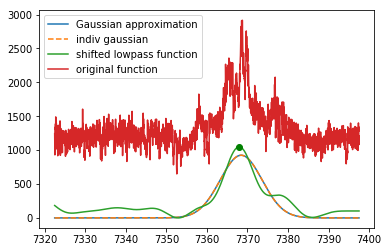

2798.9968885247886 1679.2549186227961
1122.0769524157529 372.87523685936134
986.2758115293625 250.1738325661484
874.4441813444189 220.43348504627872
780.2084842520544 201.23850051062627
701.2658869964644 188.84462383520923
650.5372777496227 178.89263385538374
614.3007951781265 168.87993857431604
593.0360610352081 158.09049918074865
579.3000604294589 148.61726195894803
566.7520698118078 140.33875554651297
548.58167095521 132.0747274249311
lpcutoff: 0.011100000000000002
[1567 1874 2074]
Finding first minmax within 0,1761
(3, 2560)
[7368.41503906 7377.41601562 7383.28027344] [1445.0207004   919.57446321  782.96919908]


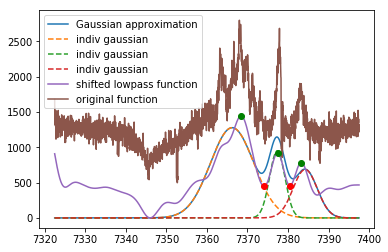

3123.996937212975 1529.0609866311884
1610.2312322652533 424.4898878171599
1348.4257267111375 257.9529793966724
1122.3757887871893 170.03442884852126
1075.4784739101988 141.98521911935205
lpcutoff: 0.0041
[ 516 1671]
Finding first minmax within 0,1138
(2, 2560)
[7322.47021484 7371.46435547] [ 472.00870946 1144.50574805]


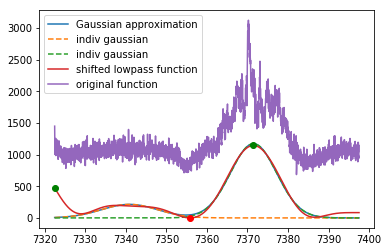

3147.9969420101256 1606.164000705698
1520.9173838258278 426.807560637553
1332.8516431034693 261.27409081709146
1208.9349477285027 227.8164143507764
1149.1468637940825 215.74163870512916
1088.6581233025609 206.02813458059526
1014.6328929591023 191.33943411269289
928.3867011323077 173.90765254828477
847.3602218279402 158.6527103122924
785.8395886708568 148.73043385336229
lpcutoff: 0.0091
[1316 1575]
Finding first minmax within 0,1422
(2, 2560)
[7361.05566406 7368.64941406] [1031.13578639 1615.24831987]


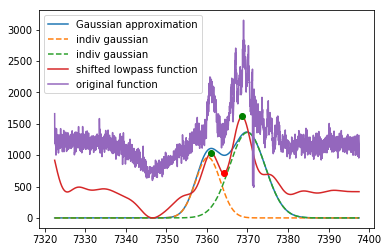

3267.996564875893 1788.186110091464
1479.5236197742547 451.86266397534683
1209.161216685187 309.62410095585517
1014.4416474714644 214.99951631349327
937.3601108545718 201.06150606555022
923.4914832247382 197.50098185289576
949.9127840316996 189.90511501510957
974.576768009324 179.44288993320674
940.5187003075926 168.520978592956
887.5256647215529 158.93231494775083
lpcutoff: 0.0091
[1594 1797]
Finding first minmax within 0,1695
(2, 2560)
[7369.20654297 7375.15820312] [1397.38131216 1442.04366717]


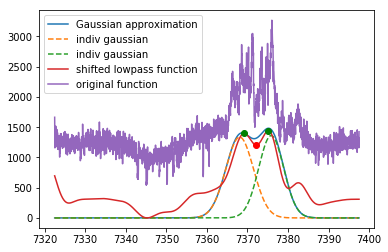

2474.9968250770853 1359.6720064655567
1182.9737489452507 316.8407778238261
997.362282819978 192.74938938781474
828.0207848845384 150.87453599701394
796.9183789904293 128.51892907385897
815.0062305729607 122.80516632841575
lpcutoff: 0.0051
[ 766 1637]
Finding first minmax within 0,1135
(2, 2560)
[7322.47021484 7370.46728516] [443.47806896 845.4886556 ]


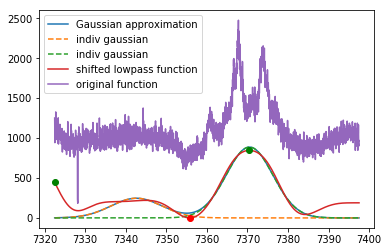

2251.9965228543824 1572.61530191868
537.7133671641636 292.0352847471086
486.12812287601446 176.84097516918482
513.7008822992552 133.39099349135014
503.4341688463403 124.79169567784658
503.6075487254002 113.63651930450573
480.11637136293984 99.59484462778575
lpcutoff: 0.0061
[1407]
Finding first minmax within 0,2560
(1, 2560)
[7363.72363281] [886.76601372]


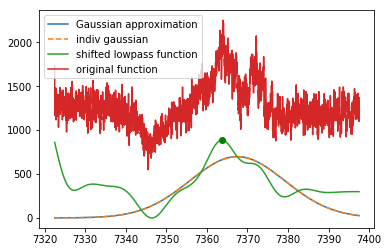

4166.9978002280795 1775.7739810930034
2379.825735827831 524.417219265794
2095.3511910938846 314.72106628765346
1860.8599608462582 258.1591547221061
1689.5611521704327 219.14231043670554
1575.718121861897 202.95464288572342
lpcutoff: 0.0051
[1558]
Finding first minmax within 0,2560
(1, 2560)
[7368.15087891] [1639.42328571]


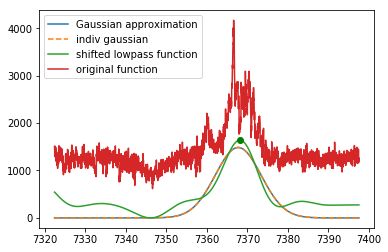

2977.9967293328823 1439.4700808555592
1459.0722625858716 415.88318197551115
1370.5762188447468 223.17840712887661
1181.0451682769426 170.01710609596608
1116.8724245649114 146.07564665121185
lpcutoff: 0.0041
[ 556 1534]
Finding first minmax within 0,1089
(2, 2560)
[7322.47021484 7367.44726562] [ 660.49669247 1002.97138271]


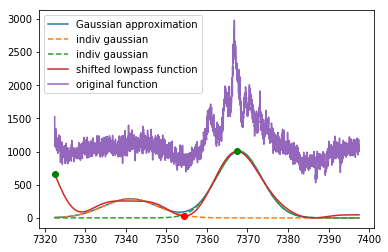

3782.9930639504473 1799.805410732344
1854.342140666123 489.06558847236266
1763.8828145790453 345.92629055337284
1575.4827608490787 281.20390903219436
1439.403403072683 249.1821074027139
1323.6015670699207 226.61922572956158
1218.3203694088047 206.7926397474645
1145.3948365703577 196.547281299436
1105.908125081828 191.21546409935306
1086.4886661528972 187.4950521599761
lpcutoff: 0.0091
[1667]
Finding first minmax within 0,2560
(1, 2560)
[7371.34667969] [1748.36424741]


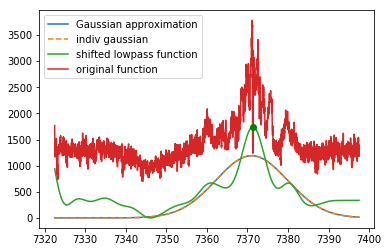

4183.996857162022 1683.4904604158965
2489.2093243965846 597.6675643389656
2176.5610830221376 380.9352912957778
1858.624418810473 299.59766346477426
1717.4322984149649 270.2193235882183
1646.3955818862764 262.9767505657057
1595.463483875811 258.1602126128111
1549.2118794140893 253.23573714660074
1501.357494253381 247.40588396366059
1443.6632696671295 239.52748329378556
1375.2534559136125 229.41706120836662
1299.7689552687534 217.35295696347472
1220.4829547121735 203.93603991494018
lpcutoff: 0.012100000000000003
[ 763 1631]
Finding first minmax within 0,1104
(2, 2560)
[7322.47021484 7370.29150391] [ 621.83365312 1980.25149519]


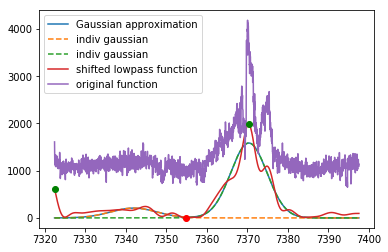

3221.9963361085406 1685.022315404279
1586.4896921054005 423.7680602691407
1326.8721539241017 375.0346476771042
1143.263205612086 236.51066089006838
1076.6686147821515 222.99053090627726
1050.5529133167356 205.99074457211603
1002.9591970095203 187.2389904784393
924.6066510677078 169.27062243713738
848.99367797588 157.61604802208814
lpcutoff: 0.0081
[1654 1910]
Finding first minmax within 0,1767
(2, 2560)
[7370.96582031 7378.47167969] [1244.26463908 1566.40798586]


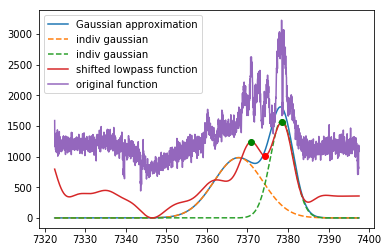

2162.9964077805985 1484.8156876827902
640.4535376089796 232.1511461731902
597.8827460724353 140.80286410308992
590.5851781144379 105.60731039850823
lpcutoff: 0.0031000000000000003
[1524]
Finding first minmax within 0,2560
(1, 2560)
[7367.15429688] [722.56142657]


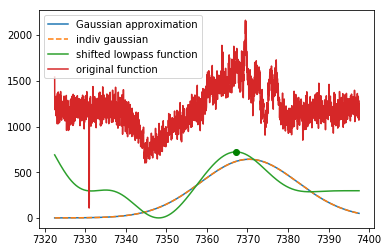

3653.9970710021457 1828.2346012278724
1839.648097284465 486.7453255092134
1498.9572958844956 405.90740423967856
1246.2222048105868 217.92554920329732
1153.7937198915215 197.04213361030256
1091.6128284648375 182.22668785369237
lpcutoff: 0.0051
[1808]
Finding first minmax within 0,2560
(1, 2560)
[7375.48095703] [1528.2296218]


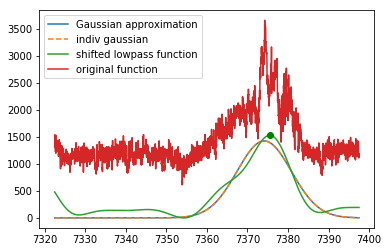

2763.9986093514967 1625.394919140359
1226.998392215443 368.16344932339865
1004.3759162657195 225.14255969230558
807.4664564582808 174.00937193841924
755.7401486595668 159.07745897286063
758.373212224293 154.98593395283763
755.2812342662512 145.42827442484239
711.7853289316445 132.56704586892818
lpcutoff: 0.0071
[ 801 1704]
Finding first minmax within 0,1214
(2, 2560)
[7322.47021484 7372.43164062] [218.94134791 991.65367886]


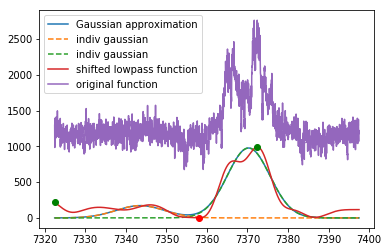

3207.9968209834756 1672.66487740263
1537.5138099189937 409.07150439896037
1297.006217400399 242.4901135196225
1143.1757826214134 193.47240237561186
1031.6719431696247 163.99648741814497
943.8855640987995 145.0864082896862
lpcutoff: 0.0051
[1578]
Finding first minmax within 0,2560
(1, 2560)
[7368.73730469] [1465.56950906]


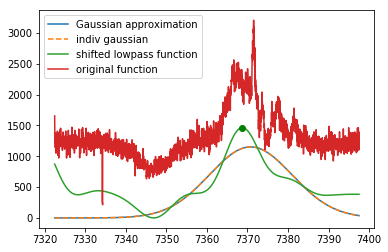

2407.996582809581 1529.6744003146368
883.3189366099814 243.2774731440356
879.5424615828647 206.26442142352266
866.8879626413691 179.74920671164625
866.610820902155 161.34567618710142
800.9176214827953 145.71902669829768
736.4748699823053 133.93707768580984
688.1650440034491 126.67612579843741
658.9099456720257 121.90230103647089
634.8429339960494 117.24060473441475
lpcutoff: 0.0091
[ 789 1512 1871]
Finding first minmax within 0,1091
(3, 2560)
[7322.47021484 7366.80224609 7377.328125  ] [612.10194618 622.46369921 808.49298713]


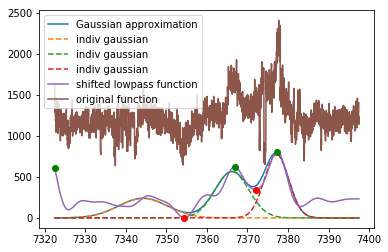

2036.99643726425 1502.6857401208078
379.0139592736821 262.4667785818657
329.1244471796108 152.69300959271538
363.8152357541014 97.54741142874408
lpcutoff: 0.0031000000000000003
[1494]
Finding first minmax within 0,2560
(1, 2560)
[7322.47021484] [867.06719797]


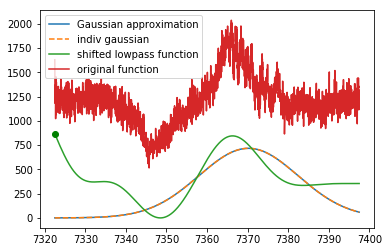

3034.9983532402894 1738.5887284901767
1355.0587398653745 447.52933278878453
1003.6857057746067 377.954612237529
763.1172532697956 182.12292787328283
727.5445741783142 179.73118933753133
749.2126907071661 164.09298674668915
776.6745676335813 156.52132804429107
764.092875673939 150.99209527251693
lpcutoff: 0.0071
[ 621 1744]
Finding first minmax within 0,1082
(2, 2560)
[7322.47021484 7373.60449219] [ 323.25371357 1283.9496964 ]


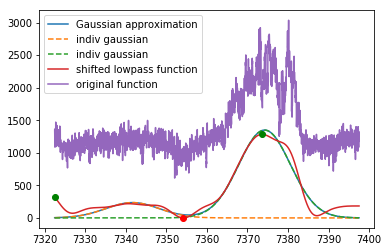

2132.995063134014 1583.0344842609907
351.0725189761006 227.0649234521589
288.88079493760233 187.87005213068915
319.08324272421055 147.40812933031404
306.0404808263877 105.56778352994827
lpcutoff: 0.0041
[1496 2044]
Finding first minmax within 0,1791
(2, 2560)
[7322.47021484 7382.40039062] [997.57741992 684.21309681]


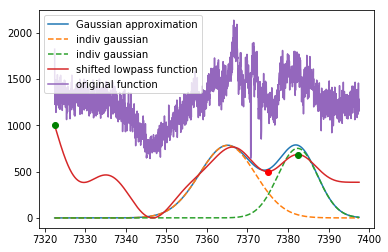

1791.998122871831 1406.1658774969653
399.26750290111363 181.31133488908617
414.6023667061329 121.44417274362921
398.1831185612125 105.52262193291956
395.19026137853075 96.61247811855037
391.68110954408985 87.69015992141306
lpcutoff: 0.0051
[ 730 1559]
Finding first minmax within 0,1097
(2, 2560)
[7322.47021484 7368.18017578] [428.53924216 377.23955303]


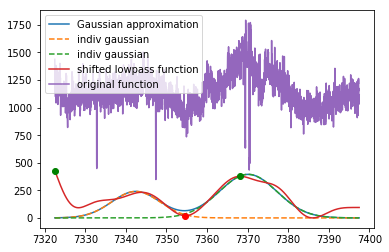

3384.9967428923824 1753.254602596486
1663.3710912724878 484.8968905242831
1424.3738027211461 330.0891119169699
1216.878296900887 280.31061597994045
1053.402811240308 243.03262934895736
920.68729792782 220.19922030179086
817.6992843543062 200.82200052386563
732.2491942345764 184.82664921698543
669.3600455314081 174.0907557644657
630.7226848201308 168.30901794881777
lpcutoff: 0.0091
[1553 1853]
Finding first minmax within 0,1741
(2, 2560)
[7368.00439453 7376.80029297] [1897.36918435  640.27257439]


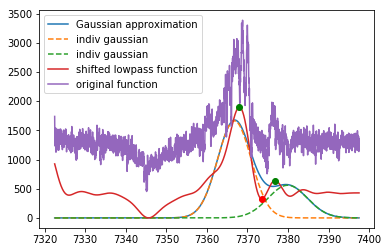

2429.997950759215 1376.4352972362665
1106.3392138726524 358.24664563970987
895.1996923152478 188.83871234280616
696.9607527821786 140.0006404156544
625.52930389726 102.00670303496058
lpcutoff: 0.0041
[ 539 1610]
Finding first minmax within 0,1124
(2, 2560)
[7322.47021484 7369.67578125] [ 397.56516466 1006.77900011]


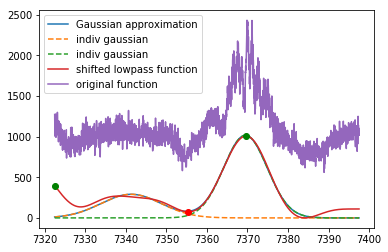

3845.9970040293956 1810.4613788786755
1995.826503775585 553.659257111591
1682.4479562455158 323.61975910291005
1415.6795086967131 251.60744603053956
1224.2030068769109 201.37620177306388
1103.55755359585 181.3881117027782
lpcutoff: 0.0051
[1604]
Finding first minmax within 0,2560
(1, 2560)
[7369.49951172] [1811.85758774]


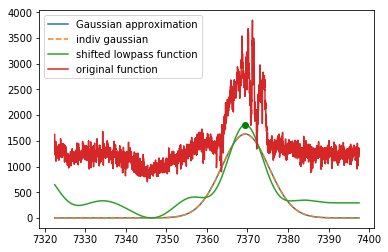

2304.9973166296277 1389.9522110203147
1007.5705261729631 295.3889173008472
795.1359064035589 184.1865645959663
623.2885625728873 110.37824899739996
lpcutoff: 0.0031000000000000003
[ 673 1681]
Finding first minmax within 0,1136
(2, 2560)
[7322.47021484 7371.75732422] [438.63569227 859.67988251]


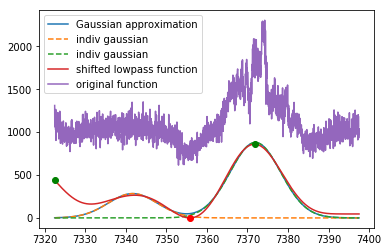

3160.996519715722 1757.1430212567118
1419.0526950495278 404.2184325909071
1208.3214947149627 254.14144602721595
1021.3084501332087 199.921919263461
913.5821200964165 174.00138705104152
880.5054482485903 168.43128410691025
891.2992300734322 162.853162316452
905.3144603713226 155.88000216712405
lpcutoff: 0.0071
[1589]
Finding first minmax within 0,2560
(1, 2560)
[7369.06005859] [1292.46554778]


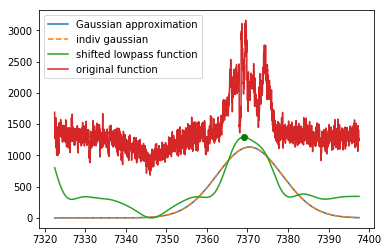

2717.996375297318 1446.1658483359283
1279.2284079986514 437.4759702886221
1059.4868647762416 229.83163352410122
861.6933210855968 170.69869807706993
782.598453838333 133.69358273182408
lpcutoff: 0.0041
[ 763 1502]
Finding first minmax within 0,1097
(2, 2560)
[7322.47021484 7366.50927734] [ 622.02310182 1135.51921744]


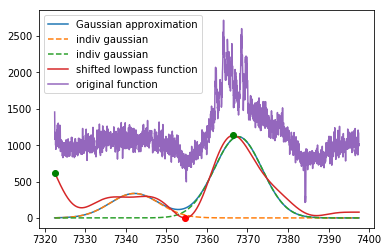

2943.9969871095145 1661.3409103168497
1388.1567259457645 247.43898142628535
1276.0175521909482 186.63020800771594
1219.4289666294196 170.60196758452776
1152.2636796988118 152.06075917681625
1088.8133960241055 141.00811083915121
lpcutoff: 0.0051
[1566 2010]
Finding first minmax within 0,1829
(2, 2560)
[7368.38574219 7381.40380859] [896.33527472 581.54660674]


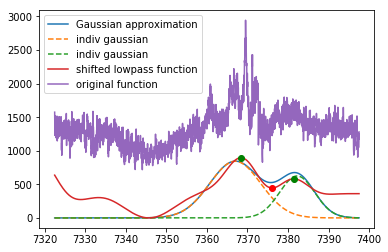

2704.995144613823 1596.4382602065841
932.2711211991596 350.216730437445
886.0340124783552 214.0493109566892
849.778113149116 156.440438731025
765.5244155060466 128.22665055935403
lpcutoff: 0.0041
[ 438 1528]
Finding first minmax within 0,815
(2, 2560)
[7322.47021484 7367.27148438] [ 916.03523509 1060.45176515]


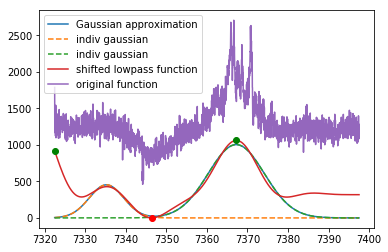

3640.996615724875 1747.572103171166
1868.8374948657054 691.840230869219
1408.685288028636 480.1750841052399
997.7980054402769 302.57996678134657
854.1288885703484 262.73946782047574
798.8579118879429 251.34046217664314
753.7610608280452 237.07622737869286
686.4356868644722 221.36889219519068
604.792796042238 206.60012557872872
528.1768665324307 194.4229066708679
471.27321975142377 185.341148814577
440.00726685176596 178.44181538066084
lpcutoff: 0.011100000000000002
[1656 1860]
Finding first minmax within 0,1785
(2, 2560)
[7371.02441406 7377.00537109] [2414.638491   1681.36082939]


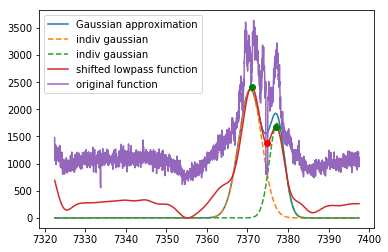

2068.9960823475276 1606.1884923780826
311.17908697946586 274.6609656888474
267.0947093389807 173.57702324870368
289.13503206209134 138.86473825890357
278.07794757133206 125.77123148352
277.80838157053654 116.21021784799083
281.8208609766216 106.98028269956556
282.4850973298285 101.99520155831942
lpcutoff: 0.0071
[1670 2087]
Finding first minmax within 0,1939
(2, 2560)
[7322.47021484 7383.66113281] [843.67207354 355.07014365]


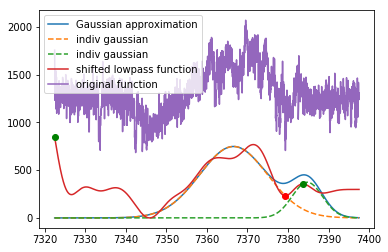

1961.9967745279644 1388.3378107605515
596.3845254349937 239.8969076618588
529.2621748697418 169.59569129078278
444.4137786777021 106.25137684098402
461.1879392947094 96.19663510006833
lpcutoff: 0.0041
[ 735 1631]
Finding first minmax within 0,1141
(2, 2560)
[7322.47021484 7370.29150391] [530.58673767 667.38909774]


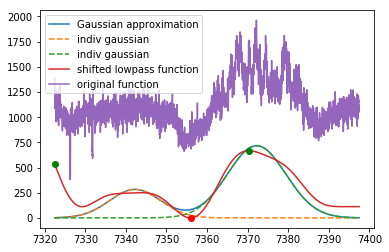

3589.9964046916716 1705.0188423167137
1865.7838483155906 554.7528711377006
1541.7251374674133 325.9988811603204
1294.8044457225483 264.633020058033
1134.7742191748084 226.32098548603855
1044.209799463882 210.3539076553913
988.4490233942433 195.02783834727936
928.6073815822028 178.39268506309733
lpcutoff: 0.0071
[1639]
Finding first minmax within 0,2560
(1, 2560)
[7370.52587891] [1884.79493427]


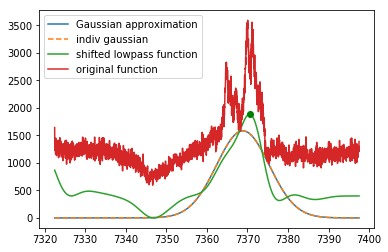

3323.9964488715527 1640.0358268669231
1724.4458315354311 446.74342383345595
1485.0000918464723 299.4883509615216
1258.2054297466389 227.53980168011293
1168.0125669224135 187.8766906485597
1124.044682581708 178.00715739562074
1117.4412418495735 171.93502547065532
1124.45419982248 163.2243817058685
lpcutoff: 0.0071
[ 307 1687]
Finding first minmax within 0,1114
(2, 2560)
[7322.47021484 7371.93310547] [ 650.86586406 1238.29156152]


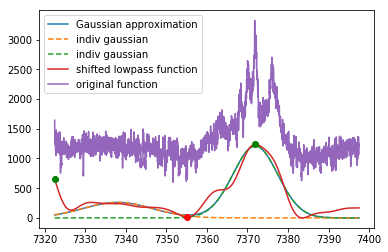

2464.9967987790656 1513.0385711442057
990.4449546721587 295.11048814800387
869.2967774444662 240.04102144339234
725.9473377093759 161.45861185507468
612.833401528351 124.54288169143466
529.4141710342899 102.190178504215
lpcutoff: 0.0051
[1790]
Finding first minmax within 0,2560
(1, 2560)
[7374.953125] [1154.72156423]


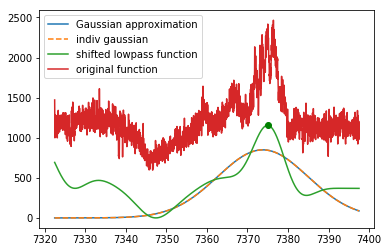

3240.9984951774386 1668.1904399761195
1593.0204013513146 446.5224401574007
1306.9458502563214 247.66237196051233
1085.0424814418984 177.82947393712007
1015.3234769288479 162.1868836961645
980.3735445115494 159.53390185048687
lpcutoff: 0.0051
[1646]
Finding first minmax within 0,2560
(1, 2560)
[7370.73095703] [1266.91803995]


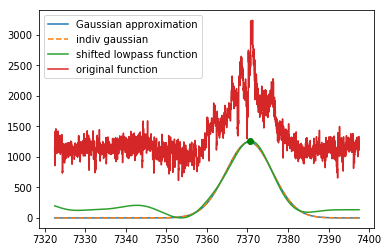

Data replaced
Time taken for slow fit: 1.2888408541679381 minutes
Time taken overall: 2.1403250018755595 minutes


In [8]:
start = time.time()
print("Optimising lowpass cutoff for fast fit")
cutoff = Fast_Backloop(intense).cutoff()
spectra_for_slow_fit = []
#lpfns, gaussians, number_of_peaks, avgsigma = [], [], [], []
    

for i in range(len(intense[:,1])):
    fn = Fast_Fit(intense[i,:],deg,cutoff,photE)
    if fn.U() == 1:
        spectra_for_slow_fit = np.append(spectra_for_slow_fit, i) 
    
    
    if i == 0:
        lpfns = fn.lpfn
        gaussians = fn.gauss()
        number_of_peaks = fn.nofpeaks()
        avgsigma = fn.avg_sigmas()
    else:
        lpfns = np.vstack((lpfns, fn.lpfn))
        gaussians = np.vstack((gaussians, fn.gauss()))
        number_of_peaks = np.vstack((number_of_peaks, fn.nofpeaks()))
        avgsigma = np.vstack((avgsigma, fn.avg_sigmas()))
    '''
    lpfns.append([fn.lpfn])
    gaussians.append([fn.gauss()])
    number_of_peaks.append( [(number_of_peaks, fn.nofpeaks())] )
    avgsigma.append( [(avgsigma, fn.avg_sigmas())] )
    '''
    

intermediate = time.time()
print("Time taken for fast fit:", (intermediate - start)/60, "minutes")
print("Number of spectra to be analysed by slow fit: ", len(spectra_for_slow_fit))
print("Beginning slow fit")

for k in spectra_for_slow_fit:
    k = int(k)
    fn = Slow_Fit(intense[k,:], photE)
    lpfns[k] = fn.lpfn
    gaussians[k] = fn.gauss()
    number_of_peaks[k] = fn.nofpeaks()
    avgsigma[k] = fn.avg_sigmas()
print("Data replaced")
end = time.time()
#lpfns, gaussians, number_of_peaks, avgsigma = np.array(lpfns), np.array(gaussians), np.array(number_of_peaks), np.array(avgsigma)
print("Time taken for slow fit:", (end - intermediate)/60, "minutes")
print("Time taken overall:", (end - start)/60, "minutes")

In [ ]:
corr = (max(photE)-min(photE))/len(intense[1,:])

# Number of peaks analysis
avg = np.average(number_of_peaks)
print("Average number of peaks:",avg)
avg2 = np.average(avgsigma)*corr
print("Average sigma of all peaks:",avg2)

In [ ]:
avg_sigmas = [0, 0, 0, 0, 0, 0, 0, 0]
counts = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(number_of_peaks)):
    index = int(number_of_peaks[i])
    counts[index] = counts[index] + 1
    
    avg_sigmas[index] = avg_sigmas[index] + avgsigma[index]*corr

for i in range(len(avg_sigmas)):
    if counts[i] == 0:
        avg_sigmas[i] = 0
    else:
        avg_sigmas[i] = avg_sigmas[i]/counts[i]

In [ ]:
for i in range(1,len(avg_sigmas)):
    print ("Number of spectra with", i, "peaks:",counts[i])
    print ("Average sigma for spectra with",i,"number of peaks:", avg_sigmas[i])
    print(" ")